In [1]:
import json
import uproot
from XRootD import client
import xgboost as xgb
import os
import sys
sys.path.append("../../analysisTools/")
from skimmerTools import Skimmer
import coffea
import coffea.util as util
import numpy as np
import awkward as ak
import time
import h5py

### Run Skimmers on skimmed ntuples with preselections, produce h5 files for BDT input

In [2]:
outdir = "./h5/"
os.system(f"mkdir -p {outdir}")

0

In [ ]:
def write_h5(data,fname):
    with h5py.File(fname,'w') as f:
        for k in data.keys():
            arr = data[k].value
            if type(arr) == np.ma.core.MaskedArray:
                arr = arr.data
            f.create_dataset(k,data=arr)

In [ ]:
suffix = "_minDxyCut_sig_v2"

In [ ]:
cut_config = "./cut_configs/BDTskimmer_preselections_minDxyCut.py"

In [ ]:
# sig_sample_json_dir = './sample_configs/' # new xsec
sig_sample_json_dir = '/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/configs/sample_configs/skimmed_signal/'
jsons = [f for f in os.listdir(sig_sample_json_dir) if ".json" in f]

#signal_list = [ samp.split('.')[0] for samp in jsons if f"skimmed_signal_v4_2018_aEM." in samp ]
signal_list = [ samp.split('.')[0] for samp in jsons if f"skimmed_sig_v2_mA_3m1_2018_aEM." in samp ]
print(signal_list)

bkg_sample_json_dir = '../../configs/sample_configs/skimmed_bkg/'
jsons = [f for f in os.listdir(bkg_sample_json_dir) if ".json" in f]

bkg_list = [ samp.split('.')[0] for samp in jsons if "skimmed_bkg" in samp ]
print(bkg_list)

In [ ]:
for samp in signal_list:
    print(f'Start analyzing: {samp}')
    
    test = Skimmer(f"{sig_sample_json_dir}/{samp}.json", cut_config)
    
    t1 = time.time()
    out = test.process(execr='futures')
    t2 = time.time()

    write_h5(out[0],f"{outdir}/{samp}{suffix}.h5")
    
    print('Completed in {:.2f} min\n'.format((t2-t1)/60))
    del out, test

In [ ]:
for samp in bkg_list:
    if 'TTJetsDiLept' in samp: # currently not available ntuples
        continue
    
    print(f'Start analyzing: {samp}')
    
    test = Skimmer(f"{bkg_sample_json_dir}/{samp}.json", cut_config)
    
    t1 = time.time()
    out = test.process(execr='futures')
    t2 = time.time()

    write_h5(out[0],f"{outdir}/{samp}{suffix}.h5")
    
    print('Completed in {:.2f} min\n'.format((t2-t1)/60))
    del out, test

# BDT

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import xgboost as xgb
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# BDT variable combination (ROC-AUC, PR-AUC)

In [ ]:
# BDT_15vars
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR',\
             'sel_vtx_minDxy','vxy','vxy_signif','sel_vtx_projectedLxy', \
             'sel_vtx_cos_collinear', 'sel_vtx_prod_eta', 'sel_vtx_pt_over_m', \
             'delta_dxy_over_maxdxy', 'met_leadPt_ratio', 'log_delta_eta_over_delta_phi', 'sel_vtx_pt_e1_over_pt_e2'
            ]

In [ ]:
# BDT_9vars_comb1
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR','sel_vtx_minDxy','vxy','vxy_signif',\
             'sel_vtx_projectedLxy', 'sel_vtx_prod_eta'
]

In [ ]:
# BDT_9vars_comb2
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR','sel_vtx_minDxy','vxy','vxy_signif',\
             'sel_vtx_cos_collinear', 'sel_vtx_prod_eta'
]

# comparing with comb1, cos_collinear brings ever-so-slightly better AUCs

In [ ]:
# BDT_8vars_comb3
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR','sel_vtx_minDxy','vxy',\
             'sel_vtx_cos_collinear', 'sel_vtx_prod_eta'
]

# comparing with comb2, keep vxy_signif

In [ ]:
# BDT_9vars_comb4
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR','sel_vtx_minDxy','vxy','vxy_signif',\
             'sel_vtx_cos_collinear', 'met_leadPt_ratio'
]

# comparing with com2, met_leadPt_ratio is ever-so-slightly less performing than prod_eta

In [ ]:
# BDT_9vars_comb5
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR','sel_vtx_minDxy','vxy','vxy_signif',\
             'sel_vtx_cos_collinear', 'log_delta_eta_over_delta_phi'
]

# slightly better with log_dEta_over_dPhi than met_leadPt_ratio

In [ ]:
# BDT_9vars_comb6
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR','sel_vtx_minDxy','vxy','vxy_signif',\
             'sel_vtx_projectedLxy', 'log_delta_eta_over_delta_phi'
]

# slightly better with cos angle than projectedlxy

In [ ]:
# BDT_8vars_comb7
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR','sel_vtx_minDxy','vxy_signif',\
             'sel_vtx_projectedLxy', 'log_delta_eta_over_delta_phi'
]

# compare with comb6, definitely keep lxy

In [ ]:
# BDT_9vars_comb8
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR','sel_vtx_minDxy','vxy','vxy_signif',\
             'sel_vtx_cos_collinear', 'sel_vtx_pt_over_m'
]

In [ ]:
# BDT_9vars_comb9
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR','sel_vtx_minDxy','vxy','vxy_signif',\
             'sel_vtx_cos_collinear', 'delta_dxy_over_maxdxy'
]

In [ ]:
# BDT_9vars_comb10
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR','sel_vtx_minDxy','vxy','vxy_signif',\
             'sel_vtx_cos_collinear', 'sel_vtx_pt_e1_over_pt_e2'
]

In [4]:
# BDT_10vars_comb11
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR','sel_vtx_minDxy','vxy','vxy_signif',\
             'sel_vtx_cos_collinear', 'sel_vtx_prod_eta', 'met_leadPt_ratio'
]

In [ ]:
# BDT_10vars_comb12
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR','sel_vtx_minDxy','vxy','vxy_signif',\
             'sel_vtx_cos_collinear', 'sel_vtx_prod_eta', 'log_delta_eta_over_delta_phi'
]

In [ ]:
# BDT_10vars_comb13
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR','sel_vtx_minDxy','vxy','vxy_signif',\
             'sel_vtx_cos_collinear', 'met_leadPt_ratio', 'log_delta_eta_over_delta_phi'
]

In [ ]:
# BDT_10vars_comb14
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_m','sel_vtx_dR','sel_vtx_minDxy','vxy','vxy_signif',\
             'sel_vtx_cos_collinear', 'sel_vtx_prod_eta', 'sel_vtx_pt_e1_over_pt_e2'
]


In [5]:
h5_dir = "./h5/"
sig_suffix = "_minDxyCut_sig_v2"
bkg_suffix = "_minDxyCut"

sig_files = [f for f in os.listdir(h5_dir) if sig_suffix in f and 'sig' in f]
bkg_files = [f for f in os.listdir(h5_dir) if bkg_suffix in f and 'bkg' in f]

# To add in the future?
# e1 pt / e2 pt (e1 and e2 need to be sorted out in pT for now)

sig_data = []

sig_data_train = []
sig_data_test = []
sig_point_train = {'m1':[], 'delta':[], 'ctau':[]}
sig_point_test = {'m1':[], 'delta':[], 'ctau':[]}

sig_xsec_norm = []

sig_xsec_norm_train = []
sig_xsec_norm_test = []
sig_point_test = {'m1':[], 'delta':[], 'ctau':[]}

sig_point = {'m1':[], 'delta':[], 'ctau':[]}

m1s = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for sf in sig_files:
    with h5py.File(f'{h5_dir}/{sf}',"r") as fin:
        entries = len(fin['wgt'])
        
        match = fin["sel_vtx_match"][()]
        mask = match==2

        entries_genMatched = sum(mask)
        print(f'Signal events {entries} -> {entries_genMatched} after gen matching (raw counts)\n')
        
        sig_data.append(np.concatenate([fin[v][()][mask].reshape(-1,1) for v in variables],axis=1))
        sig_xsec_norm.append(fin['wgt_norm'][()][mask])
        
        sig_point['m1'].append(fin['m1'][()][mask])
        sig_point['delta'].append(fin['delta'][()][mask])
        sig_point['ctau'].append(fin['ctau'][()][mask])

        # for loop for each signal point to get the sig_data_test and sig_data_train
        for m1 in m1s:
            for delta in deltas:
                for ctau in ctaus:
                    mask_sig_point = (fin['m1'][()][mask] == m1) & (fin['delta'][()][mask] == delta) & (fin['ctau'][()][mask] == ctau)
                    idx_train = int(0.8*len(fin['m1'][()][mask][mask_sig_point]))
                    #print(fin['m1'][()][mask][mask_sig_point][:idx_train])
                    sig_data_train.append(np.concatenate([fin[v][()][mask][mask_sig_point][:idx_train].reshape(-1,1) for v in variables],axis=1))
                    sig_data_test.append(np.concatenate([fin[v][()][mask][mask_sig_point][idx_train:].reshape(-1,1) for v in variables],axis=1))

                    sig_point_train['m1'].append(fin['m1'][()][mask][mask_sig_point][:idx_train])
                    sig_point_train['delta'].append(fin['delta'][()][mask][mask_sig_point][:idx_train])
                    sig_point_train['ctau'].append(fin['ctau'][()][mask][mask_sig_point][:idx_train])

                    sig_point_test['m1'].append(fin['m1'][()][mask][mask_sig_point][idx_train:])
                    sig_point_test['delta'].append(fin['delta'][()][mask][mask_sig_point][idx_train:])
                    sig_point_test['ctau'].append(fin['ctau'][()][mask][mask_sig_point][idx_train:])

                    sig_xsec_norm_train.append(fin['wgt_norm'][()][mask][mask_sig_point][:idx_train])
                    sig_xsec_norm_test.append(fin['wgt_norm'][()][mask][mask_sig_point][idx_train:])
                    

sig_data_train = np.concatenate(sig_data_train, axis=0)
sig_data_test = np.concatenate(sig_data_test, axis=0)

sig_data = np.concatenate(sig_data,axis=0)
sig_xsec_norm = np.concatenate(sig_xsec_norm,axis=0)

sig_xsec_norm_train = np.concatenate(sig_xsec_norm_train, axis=0)
sig_xsec_norm_test = np.concatenate(sig_xsec_norm_test, axis=0)

sig_point_train['m1'] = np.concatenate(sig_point_train['m1'], axis=0)
sig_point_train['delta'] = np.concatenate(sig_point_train['delta'], axis=0)
sig_point_train['ctau'] = np.concatenate(sig_point_train['ctau'], axis=0)

sig_point_test['m1'] = np.concatenate(sig_point_test['m1'], axis=0)
sig_point_test['delta'] = np.concatenate(sig_point_test['delta'], axis=0)
sig_point_test['ctau'] = np.concatenate(sig_point_test['ctau'], axis=0)

nBkg = 0
bkg_data = []

bkg_xsec_norm = []

for bf in bkg_files:
    with h5py.File(f'{h5_dir}/{bf}',"r") as fin:
        process = bf.split('_')[3]
        entries = len(fin['wgt'])
        print(f'{process}: {entries}')
        nBkg += len(fin['wgt'])
        
        bkg_data.append(np.concatenate([fin[v][()].reshape(-1,1) for v in variables],axis=1))
        bkg_xsec_norm.append(fin['wgt_norm'][()])

bkg_xsec_norm = np.concatenate(bkg_xsec_norm,axis=0)


print(f'\nNumber of total background events (raw counts): {nBkg}')

bkg_data = np.concatenate(bkg_data,axis=0)

Signal events 38693 -> 38693 after gen matching (raw counts)

DY: 3
Diboson: 149
QCD: 2
Top: 353
Triboson: 13
WJets: 4981
ZJets: 11198

Number of total background events (raw counts): 16699


In [6]:
print('Signal input statistics (unweighted)')

sig_subprocess = {}

for ctau in [1, 10, 100]:
    for delta in [0.1, 0.2]:
        for m1 in [5.,10.,20.,30.,40.,50.,60.,70.,80.,90.,100.]:
            idx = ((sig_point_train['m1'] == m1) & (sig_point_train['delta'] == delta))&(sig_point_train['ctau'] == ctau)
            point = f'm1_{m1}_delta_{delta}_ctau_{ctau}'
            sig_subprocess[point] = idx
            print(f'{point}: {np.sum(idx)}')

nSamp = 0
for samp, count in sig_subprocess.items():
    if np.sum(count) != 0:
        nSamp += 1
    else:
        print(f'{samp} has zero counts')

print(f'Number of signal subprocesses (training set) with non-zero count: {nSamp}')

Signal input statistics (unweighted)
m1_5.0_delta_0.1_ctau_1: 82
m1_10.0_delta_0.1_ctau_1: 177
m1_20.0_delta_0.1_ctau_1: 235
m1_30.0_delta_0.1_ctau_1: 278
m1_40.0_delta_0.1_ctau_1: 329
m1_50.0_delta_0.1_ctau_1: 525
m1_60.0_delta_0.1_ctau_1: 415
m1_70.0_delta_0.1_ctau_1: 489
m1_80.0_delta_0.1_ctau_1: 516
m1_90.0_delta_0.1_ctau_1: 2058
m1_100.0_delta_0.1_ctau_1: 2580
m1_5.0_delta_0.2_ctau_1: 108
m1_10.0_delta_0.2_ctau_1: 194
m1_20.0_delta_0.2_ctau_1: 267
m1_30.0_delta_0.2_ctau_1: 360
m1_40.0_delta_0.2_ctau_1: 356
m1_50.0_delta_0.2_ctau_1: 36
m1_60.0_delta_0.2_ctau_1: 0
m1_70.0_delta_0.2_ctau_1: 627
m1_80.0_delta_0.2_ctau_1: 0
m1_90.0_delta_0.2_ctau_1: 1815
m1_100.0_delta_0.2_ctau_1: 1072
m1_5.0_delta_0.1_ctau_10: 65
m1_10.0_delta_0.1_ctau_10: 173
m1_20.0_delta_0.1_ctau_10: 159
m1_30.0_delta_0.1_ctau_10: 350
m1_40.0_delta_0.1_ctau_10: 354
m1_50.0_delta_0.1_ctau_10: 482
m1_60.0_delta_0.1_ctau_10: 432
m1_70.0_delta_0.1_ctau_10: 470
m1_80.0_delta_0.1_ctau_10: 450
m1_90.0_delta_0.1_ctau_10: 1

## Reweight Backgrounds

### Background raw counts

In [7]:
bkg_raw = {}
nBkg = 0

for bf in bkg_files:
    with h5py.File(f'{h5_dir}/{bf}',"r") as fin:
        process = bf.split('_')[3]
        entries = len(fin['wgt'])
        print(f'{process}: {entries}')
        nBkg += len(fin['wgt'])

        bkg_raw[process] = entries

DY: 3
Diboson: 149
QCD: 2
Top: 353
Triboson: 13
WJets: 4981
ZJets: 11198


### Cutflow counts (xsec weighted)

In [8]:
bkg_cts = {}
total_bkg_cts = 0

for bf in bkg_files:
    with h5py.File(f'{h5_dir}/{bf}',"r") as fin:
        process = bf.split('_')[3]
        entries = sum(fin['wgt_norm'][()])
        print(f'{process}: {entries}')

        total_bkg_cts += entries
        
        bkg_cts[process] = entries

print(f'Total background counts (xsec weighted): {total_bkg_cts}')

DY: 1750.4943313598633
Diboson: 36.30237701535225
QCD: 320.04668951034546
Top: 34.520702086389065
Triboson: 0.4023284865543246
WJets: 1918.224049145938
ZJets: 1561.4901121186558
Total background counts (xsec weighted): 5621.480589723098


### Reweighing factor = `wgt_norm` / `total_bkg_cts` * `nBkg`

Reweigh the background samples, such that after reweighting the total number of backgrounds (BDT sample size) are unchanged but the relative contributions of each sub-process within the BDT sample are physically correct.

In [9]:
sf = {}
xsec_norm = {}

for bf in bkg_files:
    with h5py.File(f'{h5_dir}/{bf}',"r") as fin:
        process = bf.split('_')[3]
        entries = fin['wgt_norm'][()] / total_bkg_cts * nBkg
        #print(f'{process}: {entries}')

        sf[process] = entries
        xsec_norm[process] = fin['wgt_norm'][()]

**With the weight applied, the total bkg events are the same as raw counts, but the contribution of the relative xsec is considered now.**

In [10]:
total_weighted = 0

for process in sf.keys():
    print(f'{process}: {sum(sf[process])}')
    total_weighted += sum(sf[process])

print(total_weighted)

DY: 5199.965744018555
Diboson: 107.83874410390854
QCD: 950.721076965332
Top: 102.5461552888155
Triboson: 1.1951448284089565
WJets: 5698.218411528971
ZJets: 4638.515490211081
16699.00076694507


In [11]:
nBkg

16699

In [12]:
# SF
bkg_sf = []
bkg_xsec_norm = []

for process in sf.keys():
    bkg_sf += list(sf[process])
    bkg_xsec_norm += list(xsec_norm[process])

#print(len(bkg_sf))

In [13]:
set(bkg_xsec_norm)

{-0.05953975,
 -0.016287146,
 0.00075470324,
 0.0012511426,
 0.0042385785,
 0.01063748,
 0.012563892,
 0.016287146,
 0.024323996,
 0.028713468,
 0.030013198,
 0.037092578,
 0.038779505,
 0.039841752,
 0.043379143,
 0.045444746,
 0.05953975,
 0.08565486,
 0.18472649,
 0.19808361,
 0.2163429,
 0.2441929,
 0.2524531,
 0.29107392,
 0.34455764,
 0.3913622,
 0.55844516,
 1.1887455,
 2.7895231,
 7.842954,
 24.090977,
 312.20374,
 1702.3124}

In [14]:
len(bkg_sf)

16699

## Reweight Signal

For signal, we also apply the reweighting factors.
1) First, since our signal samples are smaller than background samples, get the overall scale factor for signal samples to match the total number of background samples. Reweigh against background.
2) Then, reweigh across signal samples. We will make all signal subprocesses "equally shown" to the BDT. Currently the inputs are biased, i.e. to have more 10% splitting, 1mm ctau, etc. We will flatten these out.

In [15]:
bkg_to_sig = len(bkg_xsec_norm)/len(sig_xsec_norm)

print(f'Signal sample size (all subprocesses summed): {len(sig_xsec_norm)}')
print(f'Background sample size (all subprocesses summed): {len(bkg_xsec_norm)}')
print(f'{bkg_to_sig} more background than signal samples')

Signal sample size (all subprocesses summed): 38693
Background sample size (all subprocesses summed): 16699
0.4315767709921691 more background than signal samples


In [16]:
print(f'There are {nSamp} subprocesses in signal, i.e. per m1/delta/ctau points.')
print(f'\nIdeally, sig and bkg sample size for BDT input should be the same.')
print(f'\nFor background, we care about each background process contribution to the total, i.e. QCD having higher xsec than Diboson.')
print(f'This should be taken into account, so we got the SF for background input that will correct for this relative xsec contribution.')
print(f'\nFor signal, we want BDT to equally "see" each subprocess. For example, delta=0.2 splitting has lower xsec than delta=0.1.')
print(f'But we want the BDT to "equally" see them. Therefore, we reweigh signal such that each subprocess relative contribution is the same.')
print(f'For signal, we also get the overall SF against bkg, because right now we have 10 times less signal input than background.')

There are 62 subprocesses in signal, i.e. per m1/delta/ctau points.

Ideally, sig and bkg sample size for BDT input should be the same.

For background, we care about each background process contribution to the total, i.e. QCD having higher xsec than Diboson.
This should be taken into account, so we got the SF for background input that will correct for this relative xsec contribution.

For signal, we want BDT to equally "see" each subprocess. For example, delta=0.2 splitting has lower xsec than delta=0.1.
But we want the BDT to "equally" see them. Therefore, we reweigh signal such that each subprocess relative contribution is the same.
For signal, we also get the overall SF against bkg, because right now we have 10 times less signal input than background.


In [17]:
print(f'This means, for each one of {nSamp} signal subprocesses, there should be [n(background sample size)/n(number of signal subprocess)] = {len(bkg_xsec_norm)/nSamp}')

This means, for each one of 62 signal subprocesses, there should be [n(background sample size)/n(number of signal subprocess)] = 269.33870967741933


In [18]:
print(f'We will get the SF for each signal subprocess such that their weighted count corresponds to {len(bkg_xsec_norm)/nSamp}')

We will get the SF for each signal subprocess such that their weighted count corresponds to 269.33870967741933


In [19]:
#sig_sf = np.zeros(len(sig_xsec_norm)) # initialize
sig_sf = np.zeros(len(sig_data_train))

#nSubprocessWeighted = len(bkg_xsec_norm)/nSamp
nSubprocessWeighted = total_weighted/nSamp
#nSubprocessWeighted = nSamp

for samp, idx in sig_subprocess.items():
    samp_idx = np.nonzero(idx)[0]
    nSubprocess = np.sum(idx) # unweighted
    
    if nSubprocess == 0:
        continue
    sf = nSubprocessWeighted/nSubprocess

    print(f'{samp}: {sf}')

    sig_sf[samp_idx] = sf

print(sig_sf)

m1_5.0_delta_0.1_ctau_1: 3.2846185615548924
m1_10.0_delta_0.1_ctau_1: 1.5216876951836225
m1_20.0_delta_0.1_ctau_1: 1.1461222214787283
m1_30.0_delta_0.1_ctau_1: 0.9688443239118747
m1_40.0_delta_0.1_ctau_1: 0.8186587296276631
m1_50.0_delta_0.1_ctau_1: 0.5130261372333356
m1_60.0_delta_0.1_ctau_1: 0.6490089687891595
m1_70.0_delta_0.1_ctau_1: 0.5507949326124768
m1_80.0_delta_0.1_ctau_1: 0.521974267533917
m1_90.0_delta_0.1_ctau_1: 0.1308740146003407
m1_100.0_delta_0.1_ctau_1: 0.1043948535067834
m1_5.0_delta_0.2_ctau_1: 2.493877055995381
m1_10.0_delta_0.2_ctau_1: 1.3883439280799028
m1_20.0_delta_0.2_ctau_1: 1.0087592586048733
m1_30.0_delta_0.2_ctau_1: 0.7481631167986144
m1_40.0_delta_0.2_ctau_1: 0.756569443953655
m1_50.0_delta_0.2_ctau_1: 7.481631167986143
m1_70.0_delta_0.2_ctau_1: 0.4295673397886781
m1_90.0_delta_0.2_ctau_1: 0.14839599010881607
m1_100.0_delta_0.2_ctau_1: 0.2512488078801317
m1_5.0_delta_0.1_ctau_10: 4.143672646884633
m1_10.0_delta_0.1_ctau_10: 1.5568712257080992
m1_20.0_delta

In [20]:
'''
sig_sf = np.zeros(len(sig_xsec_norm)) # initialize

nSubprocessWeighted = len(bkg_xsec_norm)/nSamp
#nSubprocessWeighted = nSamp

for samp, idx in sig_subprocess.items():
    samp_idx = np.nonzero(idx)[0]
    nSubprocess = np.sum(idx) # unweighted
    
    if nSubprocess == 0:
        continue
    sf = nSubprocessWeighted/nSubprocess

    print(f'{samp}: {sf}')

    sig_sf[samp_idx] = sf

print(sig_sf)
'''

"\nsig_sf = np.zeros(len(sig_xsec_norm)) # initialize\n\nnSubprocessWeighted = len(bkg_xsec_norm)/nSamp\n#nSubprocessWeighted = nSamp\n\nfor samp, idx in sig_subprocess.items():\n    samp_idx = np.nonzero(idx)[0]\n    nSubprocess = np.sum(idx) # unweighted\n    \n    if nSubprocess == 0:\n        continue\n    sf = nSubprocessWeighted/nSubprocess\n\n    print(f'{samp}: {sf}')\n\n    sig_sf[samp_idx] = sf\n\nprint(sig_sf)\n"

In [21]:
type(sig_sf)

numpy.ndarray

In [22]:
len(sig_sf)

29834

### Train

In [23]:
bkg_sf_arr = np.array(bkg_sf)
sig_sf_arr = sig_sf

In [24]:
from sklearn.utils import shuffle

rng = np.random.default_rng(seed=438290)
random_state = rng.integers(0,100000,1)[0]

# 8-2 split of train/test set; shuffle the array of SFs accordingly
'''
sig_train, sig_test = train_test_split(sig_data,train_size=0.8,random_state=random_state)
sig_train_sf, sig_test_sf = train_test_split(sig_sf_arr, train_size=0.8, random_state=random_state)
sig_train_xsec_norm, sig_test_xsec_norm = train_test_split(sig_xsec_norm, train_size=0.8, random_state=random_state)
sig_train_m1, sig_test_m1 = train_test_split(sig_point['m1'], train_size=0.8, random_state=random_state)
sig_train_delta, sig_test_delta = train_test_split(sig_point['delta'], train_size=0.8, random_state=random_state)
sig_train_ctau, sig_test_ctau = train_test_split(sig_point['ctau'], train_size=0.8, random_state=random_state)
'''

sig_train = shuffle(sig_data_train, random_state=random_state)
sig_test = shuffle(sig_data_test, random_state=random_state)
sig_train_sf = shuffle(sig_sf_arr, random_state=random_state)

sig_train_xsec_norm = shuffle(sig_xsec_norm_train, random_state=random_state)
sig_test_xsec_norm = shuffle(sig_xsec_norm_test, random_state=random_state)

sig_train_m1 = shuffle(sig_point_train['m1'], random_state=random_state)
sig_test_m1 = shuffle(sig_point_test['m1'], random_state=random_state)

sig_train_delta = shuffle(sig_point_train['delta'], random_state=random_state)
sig_test_delta = shuffle(sig_point_test['delta'], random_state=random_state)

sig_train_ctau = shuffle(sig_point_train['ctau'], random_state=random_state)
sig_test_ctau = shuffle(sig_point_test['ctau'], random_state=random_state)

bkg_train, bkg_test = train_test_split(bkg_data,train_size=0.8,random_state=random_state)
bkg_train_sf, bkg_test_sf = train_test_split(bkg_sf_arr, train_size=0.8, random_state=random_state)
bkg_train_xsec_norm, bkg_test_xsec_norm = train_test_split(bkg_xsec_norm, train_size=0.8, random_state=random_state)

bkg_train_m1, bkg_test_m1 = train_test_split(np.zeros(bkg_sf_arr.shape[0]), train_size=0.8, random_state=random_state)
bkg_train_delta, bkg_test_delta = train_test_split(np.zeros(bkg_sf_arr.shape[0]), train_size=0.8, random_state=random_state)
bkg_train_ctau, bkg_test_ctau = train_test_split(np.zeros(bkg_sf_arr.shape[0]), train_size=0.8, random_state=random_state)

train = np.concatenate((sig_train,bkg_train),axis=0)
train_sf = np.concatenate((sig_train_sf,bkg_train_sf),axis=0)
train_sf = abs(train_sf)  # training sf cannot have negative values, genWgts have negative values, take abs for now, which is not correct :( 

train_xsec_norm = np.concatenate((sig_train_xsec_norm, bkg_train_xsec_norm), axis=0)
train_m1 = np.concatenate((sig_train_m1,bkg_train_m1),axis=0)
train_delta = np.concatenate((sig_train_delta,bkg_train_delta),axis=0)
train_ctau = np.concatenate((sig_train_ctau,bkg_train_ctau),axis=0)

y_train = np.concatenate((np.ones(len(sig_train)),np.zeros(len(bkg_train))),axis=0)

perm = rng.permutation(len(train))
train = train[perm]
y_train = y_train[perm]
dtrain = xgb.DMatrix(train,label=y_train,feature_names=variables)

train_m1 = train_m1[perm]
train_delta = train_delta[perm]
train_ctau = train_ctau[perm]

train_xsec_norm = train_xsec_norm[perm]

test = np.concatenate((sig_test,bkg_test),axis=0)

test_xsec_norm = np.concatenate((sig_test_xsec_norm, bkg_test_xsec_norm), axis=0)

test_m1 = np.concatenate((sig_test_m1,bkg_test_m1),axis=0)
test_delta = np.concatenate((sig_test_delta,bkg_test_delta),axis=0)
test_ctau = np.concatenate((sig_test_ctau,bkg_test_ctau),axis=0)

y_test = np.concatenate((np.ones(len(sig_test)),np.zeros(len(bkg_test))),axis=0)

perm = rng.permutation(len(test))
test = test[perm]
y_test = y_test[perm]
test_xsec_norm = test_xsec_norm[perm]
test_m1 = test_m1[perm]
test_delta = test_delta[perm]
test_ctau = test_ctau[perm]

dtest = xgb.DMatrix(test,label=y_test,feature_names=variables)

In [25]:
# bkg 
test_xsec_norm[(test_m1 == 0) & (test_delta == 0) & (test_ctau == 0)]

array([0.34455764, 0.18472649, 0.55844516, ..., 0.02871347, 0.18472649,
       0.18472649], dtype=float32)

In [26]:
'''
# signal
m1 = 20
delta = 0.2
ctau = 10

np.sum(test_xsec_norm[((test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau)) & (pred_test > 0.96)])
'''

'\n# signal\nm1 = 20\ndelta = 0.2\nctau = 10\n\nnp.sum(test_xsec_norm[((test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau)) & (pred_test > 0.96)])\n'

In [27]:
#test_ctau[np.where(y_test == ct)] # signal

In [28]:
test_ctau[np.where(y_test == 0)] # bkg; should all be zeros by construction, printing out to check if this is the case (not messed up by random_state)

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# grid search
bst = xgb.XGBRegressor()

#model = XGBClassifier()
#learning_rate = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1]
learning_rate = [1e-4]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(bst, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
#pyplot.errorbar(learning_rate, means, yerr=stds)
#pyplot.title("XGBoost learning_rate vs Log Loss")
#pyplot.xlabel('learning_rate')
#pyplot.ylabel('Log Loss')
#pyplot.savefig('learning_rate.png')
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import StratifiedKFold\n\n# grid search\nbst = xgb.XGBRegressor()\n\n#model = XGBClassifier()\n#learning_rate = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1]\nlearning_rate = [1e-4]\nparam_grid = dict(learning_rate=learning_rate)\nkfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)\ngrid_search = GridSearchCV(bst, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)\ngrid_result = grid_search.fit(train, y_train)\n\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\n\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n# plot\n#pyplot.errorbar(learning_rate, means, yerr=stds)\n#pyplot.title("XGBoost learning_rate vs Log Loss")\n#p

In [30]:
# (1000, 6, 0.005)     0.9960
# (700, 6, 0.01)       0.9966
# (500, 6, 0.01)       0.9960
# (300, 6, 0.02)       0.9964
# (100, 6, 0.05)       0.9960

n_estimators = 500
max_depth = 6
#learning_rate = 1./n_estimators
learning_rate = 0.01

# lr scan [1/n_estimators, 0.01, 0.05, 0.1]

In [32]:
bst = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, objective='binary:logistic')

# bst = xgb.XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.05, objective='binary:logistic')

bst.fit(train, y_train, sample_weight=train_sf, 
        eval_set=[(test, y_test)], eval_metric="rmse", early_stopping_rounds=10)

#bst.fit(train, y_train, sample_weight=train_sf, 
#        eval_metric="loss", eval_set=[(test, y_test)], early_stopping_rounds=3)

[0]	validation_0-rmse:0.49585
[1]	validation_0-rmse:0.49175
[2]	validation_0-rmse:0.48770
[3]	validation_0-rmse:0.48368
[4]	validation_0-rmse:0.47970
[5]	validation_0-rmse:0.47579
[6]	validation_0-rmse:0.47193
[7]	validation_0-rmse:0.46807
[8]	validation_0-rmse:0.46423
[9]	validation_0-rmse:0.46044
[10]	validation_0-rmse:0.45670
[11]	validation_0-rmse:0.45305
[12]	validation_0-rmse:0.44945
[13]	validation_0-rmse:0.44583
[14]	validation_0-rmse:0.44226
[15]	validation_0-rmse:0.43871
[16]	validation_0-rmse:0.43527
[17]	validation_0-rmse:0.43186
[18]	validation_0-rmse:0.42845
[19]	validation_0-rmse:0.42508
[20]	validation_0-rmse:0.42178
[21]	validation_0-rmse:0.41849
[22]	validation_0-rmse:0.41528
[23]	validation_0-rmse:0.41205
[24]	validation_0-rmse:0.40891
[25]	validation_0-rmse:0.40577
[26]	validation_0-rmse:0.40268
[27]	validation_0-rmse:0.39961
[28]	validation_0-rmse:0.39661
[29]	validation_0-rmse:0.39365
[30]	validation_0-rmse:0.39068
[31]	validation_0-rmse:0.38776
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='binary:logistic', predictor=None, ...)

In [33]:
pred_test = bst.predict(test)
pred_train = bst.predict(train)

In [34]:
os.system('mkdir -p plots')

0

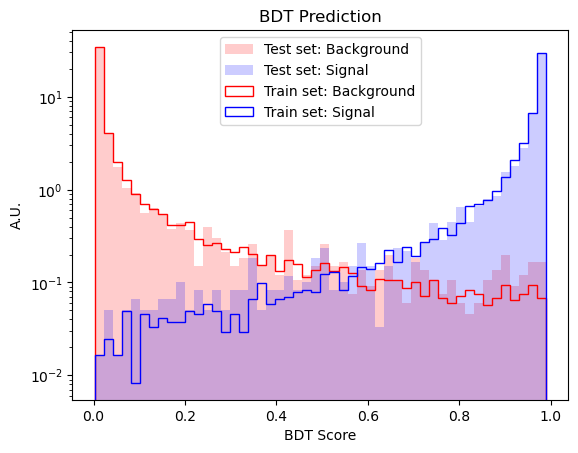

In [35]:
bins = 50

h,bins,_ = plt.hist(pred_test[y_test==0],bins=bins,density=True, histtype='stepfilled', label='Test set: Background', alpha=0.2, color='red')
h,bins,_ = plt.hist(pred_test[y_test==1],bins=bins,density=True, histtype='stepfilled', label='Test set: Signal', alpha=0.2, color='blue')

h,bins,_ = plt.hist(pred_train[y_train==0],bins=bins,density=True, histtype='step', label='Train set: Background',  color='red')
h,bins,_ = plt.hist(pred_train[y_train==1],bins=bins,density=True, histtype='step', label='Train set: Signal', color='blue')

plt.legend()
plt.title('BDT Prediction')

plt.xlabel('BDT Score')
plt.ylabel('A.U.')

plt.yscale('log')

plt.savefig(f'plots/BDT_sig_v2_minDxyCut_10Vars_comb11_score_max_depth_{max_depth}_n_estimators_{n_estimators}_lr_{learning_rate}.png')

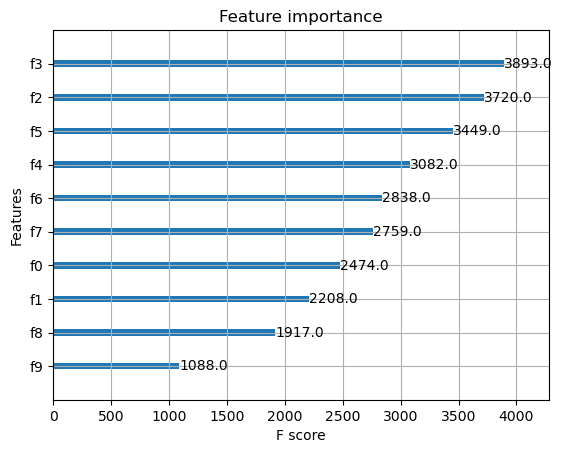

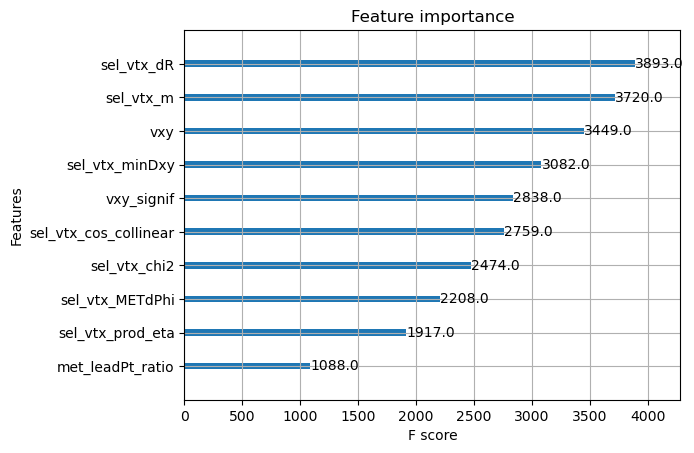

In [36]:
# Label the feature importance plot: replace, i.e. f1 with the variable name lead_jet_pt
label_dict = {}

for idx, var in enumerate(variables):
    label_dict['f{}'.format(idx)] = var
#print(label_dict)

# Plot importance

xgb.plot_importance(bst)

ticks = [ item.get_text() for item in plt.gca().get_yticklabels() ]
#print(ticks)
relabel = [ label_dict[tick] for tick in ticks ]
#print(relabel)

# Plot importance with axis with variable names
xgb.plot_importance(bst).set_yticklabels(relabel)

plt.savefig(f'plots/BDT_sig_v2_minDxyCut_10Vars_comb11_importance_bst_max_depth_{max_depth}_n_estimators_{n_estimators}_lr_{learning_rate}.png', bbox_inches = "tight")

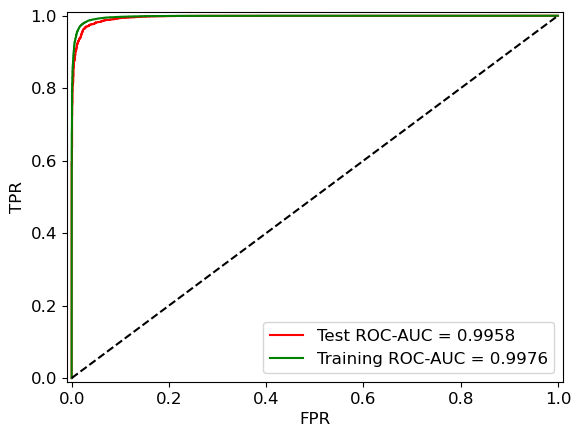

In [37]:
# ROC
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, roc_curve, confusion_matrix, average_precision_score, precision_recall_curve

# test predictions

fpr, tpr, thresholds = roc_curve(y_test, pred_test)
auc = roc_auc_score(y_test, pred_test)

plt.plot(fpr, tpr, color = "red", label = F"Test ROC-AUC = {auc:.4f}")

# train predictions

fpr, tpr, thresholds = roc_curve(y_train, pred_train)
auc = roc_auc_score(y_train, pred_train)

plt.plot(fpr, tpr, color = "green", label = F"Training ROC-AUC = {auc:.4f}")

plt.plot([0,1], [0,1] , color = "black", ls = "--")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('FPR' , fontsize=12)
plt.ylabel('TPR' , fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend( prop={'size':12} , loc = 4)

plt.savefig(f'plots/BDT_sig_v2_minDxyCut_10Vars_comb11_roc_curve_max_depth_{max_depth}_n_estimators_{n_estimators}_lr_{learning_rate}.png')

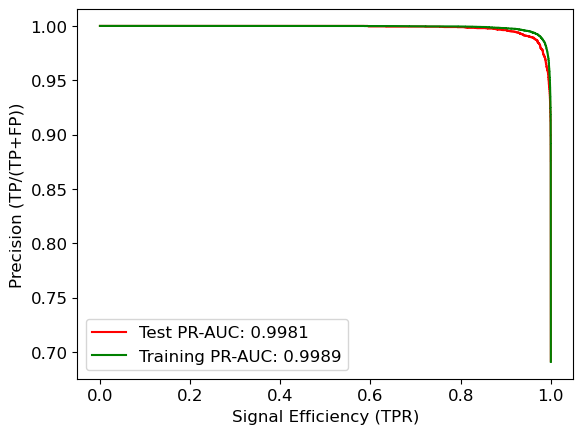

In [38]:
# PR
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, roc_curve, confusion_matrix, average_precision_score, precision_recall_curve
from sklearn.metrics import auc

# test predictions

precision, recall, thresholds2 = precision_recall_curve(y_test, pred_test)

plt.plot(recall, precision, color = "red", label=f"Test PR-AUC: {auc(recall, precision):.4f}")

# train predictions

precision, recall, thresholds2 = precision_recall_curve(y_train, pred_train)

plt.plot(recall, precision, color = "green", label=f"Training PR-AUC: {auc(recall, precision):.4f}")

plt.ylabel('Precision (TP/(TP+FP))', fontsize=12)
plt.xlabel('Signal Efficiency (TPR)', fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend( prop={'size':12} , loc = 3)
plt.savefig(f'plots/BDT_sig_v2_minDxyCut_10Vars_comb11_PR_curve_max_depth_{max_depth}_n_estimators_{n_estimators}_lr_{learning_rate}.png')

### Pearson Correlation

In [ ]:
import pandas as pd

df_bkg = pd.DataFrame(bkg_data, columns = variables)
df_sig = pd.DataFrame(sig_data, columns = variables)
df_all = pd.DataFrame(np.concatenate((bkg_data,sig_data),axis=0), columns = variables)

In [ ]:
corr_all = df_all.corr()
corr_bkg = df_bkg.corr()
corr_sig = df_sig.corr()

In [ ]:
import seaborn as sb
from matplotlib.colors import LogNorm, Normalize

fig, ax = plt.subplots(figsize=(10,10))
ax = sb.heatmap(corr_all, annot=True, linewidths=.5)

plt.savefig('minDxyCut_sig_correlation.png')

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sb.heatmap(corr_bkg, annot=True, linewidths=.5)
plt.title(f'PCC in Background Samples (Dataset size: {bkg_data.shape[0]})') # Unweighted by xsec

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sb.heatmap(corr_sig, annot=True, linewidths=.5)
plt.title(f'PCC in Signal Samples (Dataset size: {sig_data.shape[0]})')

### Save and load

In [ ]:
os.system(f'mkdir -p models')

In [39]:
bst.save_model(f'models/BDT_sig_v2_minDxyCut_10Vars_comb11_max_depth_{max_depth}_n_estimators_{n_estimators}_lr_{learning_rate}.json')

#bst.save_model(f'models/BDTv6.json')

In [40]:
trained_model = xgb.XGBRegressor()
trained_model.load_model(f'models/BDT_sig_v2_minDxyCut_10Vars_comb11_max_depth_{max_depth}_n_estimators_{n_estimators}_lr_{learning_rate}.json') # 10 variables combination 11

In [41]:
pred_test = trained_model.predict(test)
pred_train = trained_model.predict(train)

In [42]:
'''
h_sig = pred_test[y_test == 1]
h_bkg = pred_test[y_test == 0]
'''

'\nh_sig = pred_test[y_test == 1]\nh_bkg = pred_test[y_test == 0]\n'

In [43]:
'''
# S/B scan on the score (xsec unweighted)
h_sig_sum = []
h_bkg_sum = []

for idx, entry in enumerate(h_sig):
    integral = 0
    for j in range(idx):
        integral += h_sig[j]
    h_sig_sum.append(integral)

for idx, entry in enumerate(h_bkg):
    integral = 0
    for j in range(idx):
        integral += h_bkg[j]
    h_bkg_sum.append(integral)

np.array(h_sig_sum)/np.sqrt(h_bkg_sum)
'''

'\n# S/B scan on the score (xsec unweighted)\nh_sig_sum = []\nh_bkg_sum = []\n\nfor idx, entry in enumerate(h_sig):\n    integral = 0\n    for j in range(idx):\n        integral += h_sig[j]\n    h_sig_sum.append(integral)\n\nfor idx, entry in enumerate(h_bkg):\n    integral = 0\n    for j in range(idx):\n        integral += h_bkg[j]\n    h_bkg_sum.append(integral)\n\nnp.array(h_sig_sum)/np.sqrt(h_bkg_sum)\n'

[Text(0, 0, 'met_leadPt_ratio'),
 Text(0, 1, 'sel_vtx_prod_eta'),
 Text(0, 2, 'sel_vtx_METdPhi'),
 Text(0, 3, 'sel_vtx_chi2'),
 Text(0, 4, 'sel_vtx_cos_collinear'),
 Text(0, 5, 'vxy_signif'),
 Text(0, 6, 'sel_vtx_minDxy'),
 Text(0, 7, 'vxy'),
 Text(0, 8, 'sel_vtx_m'),
 Text(0, 9, 'sel_vtx_dR')]

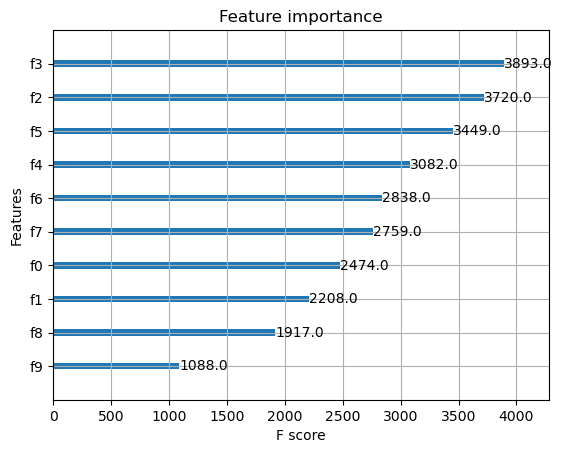

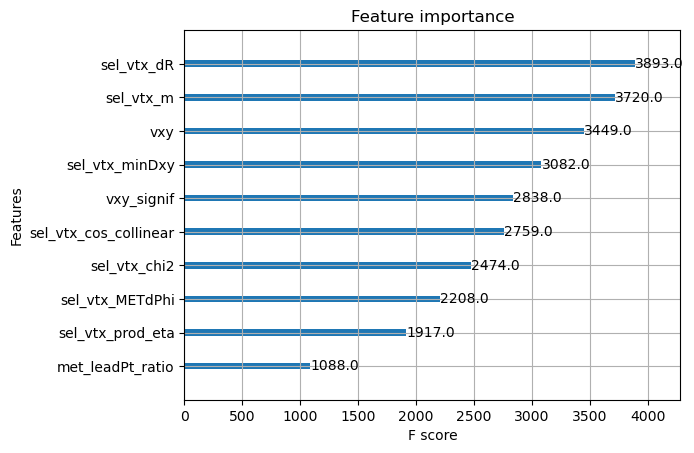

In [44]:
# Label the feature importance plot: replace, i.e. f1 with the variable name lead_jet_pt
label_dict = {}

for idx, var in enumerate(variables):
    label_dict['f{}'.format(idx)] = var
#print(label_dict)

# Plot importance

xgb.plot_importance(trained_model)

ticks = [ item.get_text() for item in plt.gca().get_yticklabels() ]
#print(ticks)
relabel = [ label_dict[tick] for tick in ticks ]
#print(relabel)

# Plot importance with axis with variable names
xgb.plot_importance(trained_model).set_yticklabels(relabel)
#plt.savefig('plots/importance_bst_weighted.png', bbox_inches = "tight")

In [45]:
def get_roc(y_true, y_pred, thres):
    FP = np.count_nonzero((y_true == 0) & (y_pred >= thres))
    TP = np.count_nonzero((y_true == 1) & (y_pred >= thres))
    
    FN = np.count_nonzero((y_true == 1) & (y_pred < thres))
    TN = np.count_nonzero((y_true == 0) & (y_pred < thres))
    
    FPR = FP/(FP+TN)
    TPR = TP/(TP+FN)
    
    s_over_sqrtB = TP/np.sqrt(FP)
    print(f'thres = {thres}, TPR = {TPR}, FPR = {FPR}, s_over_sqrtB = {s_over_sqrtB}')
    
    return TPR, FPR, s_over_sqrtB

In [46]:
def get_roc_auc(y_true, y_pred):
    s_over_sqrtBs = []
    TPRs = []
    FPRs = []
    
    epsilon = 0.005
    scan_range = np.linspace(0+epsilon,1-epsilon,10000)
    for thres in scan_range:
        TPR, FPR, s_over_sqrtB = get_roc(y_true, y_pred, thres)
        TPRs.append(TPR)
        FPRs.append(FPR)
        s_over_sqrtBs.append(s_over_sqrtB)
        
    return TPRs, FPRs, s_over_sqrtBs

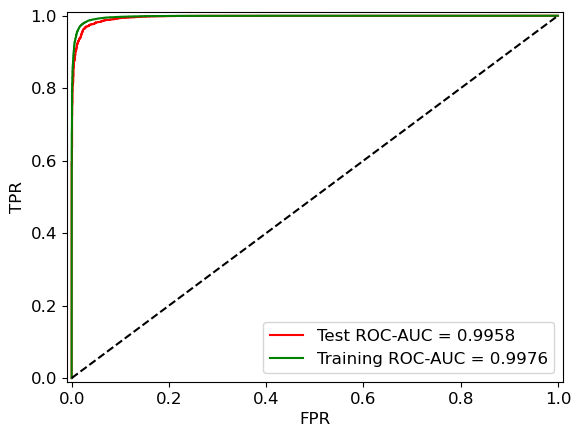

In [47]:
# ROC
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, roc_curve, confusion_matrix, average_precision_score, precision_recall_curve

# test predictions

fpr, tpr, thresholds = roc_curve(y_test, pred_test)
auc = roc_auc_score(y_test, pred_test)

plt.plot(fpr, tpr, color = "red", label = F"Test ROC-AUC = {auc:.4f}")

# train predictions

fpr, tpr, thresholds = roc_curve(y_train, pred_train)
auc = roc_auc_score(y_train, pred_train)

plt.plot(fpr, tpr, color = "green", label = F"Training ROC-AUC = {auc:.4f}")

plt.plot([0,1], [0,1] , color = "black", ls = "--")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('FPR' , fontsize=12)
plt.ylabel('TPR' , fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend( prop={'size':12} , loc = 4)


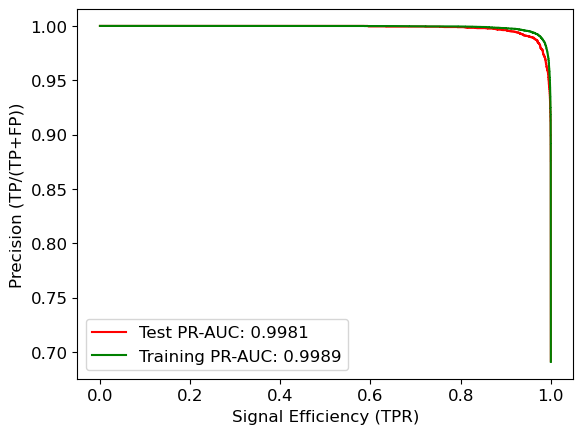

In [48]:
# ROC
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, roc_curve, confusion_matrix, average_precision_score, precision_recall_curve
from sklearn.metrics import auc

# test predictions

precision, recall, thresholds2 = precision_recall_curve(y_test, pred_test)

plt.plot(recall, precision, color = "red", label=f"Test PR-AUC: {auc(recall, precision):.4f}")

# train predictions

precision, recall, thresholds2 = precision_recall_curve(y_train, pred_train)

plt.plot(recall, precision, color = "green", label=f"Training PR-AUC: {auc(recall, precision):.4f}")

plt.ylabel('Precision (TP/(TP+FP))', fontsize=12)
plt.xlabel('Signal Efficiency (TPR)', fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend( prop={'size':12} , loc = 3)

### WP for a given signal efficiency

In [52]:
idx_valid = thresholds < 1

tpr = tpr[idx_valid]
thresholds = thresholds[idx_valid]

In [53]:
tpr_WP = {'tight': 0.7, 'medium': 0.85, 'loose': 0.9}
thres_WP = {'tight': 0, 'medium': 0, 'loose': 0}

In [54]:
epsilon = 0.005

for wp in tpr_WP.keys():    
    idx = np.where((tpr > tpr_WP[wp] - epsilon) & (tpr < tpr_WP[wp] + epsilon))
    
    thres_WP[wp] = thresholds[idx].mean()

    print(f'{wp} threshold: {thres_WP[wp]}')

tight threshold: 0.9851046204566956
medium threshold: 0.9646217226982117
loose threshold: 0.9386101365089417


### TPR, FPR, Significance with raw and weighted counts for WP scan

In [55]:
# bkg 

thres = 0.9

nbkg_total = np.sum(test_xsec_norm[(test_m1 == 0) & (test_delta == 0) & (test_ctau == 0)])
nbkg_pass = np.sum(test_xsec_norm[((test_m1 == 0) & (test_delta == 0) & (test_ctau == 0)) & (pred_test > thres)])

print(f'nbkg_pass / nbkg_total = {nbkg_pass:.2f} / {nbkg_total:.2f}')

nbkg_pass / nbkg_total = 8.38 / 724.58


In [56]:
# bkg 

bkg_train_total = train_xsec_norm[(train_m1 == 0) & (train_delta == 0) & (train_ctau == 0)]
bkg_train_pass = train_xsec_norm[((train_m1 == 0) & (train_delta == 0) & (train_ctau == 0)) & (pred_train > thres)]

bkg_test_total = test_xsec_norm[(test_m1 == 0) & (test_delta == 0) & (test_ctau == 0)]
bkg_test_pass = test_xsec_norm[((test_m1 == 0) & (test_delta == 0) & (test_ctau == 0)) & (pred_test > thres)]

nbkg_train_total = np.sum(bkg_train_total)
nbkg_train_pass = np.sum(bkg_train_pass)

nbkg_test_total = np.sum(bkg_test_total)
nbkg_test_pass = np.sum(bkg_test_pass)

print(f'nbkg_train_pass / nbkg_train_total = {nbkg_train_pass:.2f} / {nbkg_train_total:.2f}')
print(f'nbkg_test_pass / nbkg_test_total = {nbkg_test_pass:.2f} / {nbkg_test_total:.2f}')

print(f'nbkg_pass / nbkg_total = {nbkg_train_pass+nbkg_test_pass:.2f} / {nbkg_train_total+nbkg_test_total:.2f}')

nbkg_train_pass / nbkg_train_total = 25.67 / 4896.90
nbkg_test_pass / nbkg_test_total = 8.38 / 724.58
nbkg_pass / nbkg_total = 34.05 / 5621.48


In [57]:
# bkg 
bkg_train_total = train_xsec_norm[(train_m1 == 0) & (train_delta == 0) & (train_ctau == 0)]
bkg_train_pass = train_xsec_norm[((train_m1 == 0) & (train_delta == 0) & (train_ctau == 0)) & (pred_train > thres)]

bkg_test_total = test_xsec_norm[(test_m1 == 0) & (test_delta == 0) & (test_ctau == 0)]
bkg_test_pass = test_xsec_norm[((test_m1 == 0) & (test_delta == 0) & (test_ctau == 0)) & (pred_test > thres)]

nbkg_train_total = np.sum(bkg_train_total)
nbkg_train_pass = np.sum(bkg_train_pass)

nbkg_test_total = np.sum(bkg_test_total)
nbkg_test_pass = np.sum(bkg_test_pass)

print(f'nbkg_train_pass / nbkg_train_total = {nbkg_train_pass:.2f} / {nbkg_train_total:.2f}')
print(f'nbkg_test_pass / nbkg_test_total = {nbkg_test_pass:.2f} / {nbkg_test_total:.2f}')

print(f'nbkg_pass / nbkg_total = {nbkg_train_pass+nbkg_test_pass:.2f} / {nbkg_train_total+nbkg_test_total:.2f}')

nbkg_train_pass / nbkg_train_total = 25.67 / 4896.90
nbkg_test_pass / nbkg_test_total = 8.38 / 724.58
nbkg_pass / nbkg_total = 34.05 / 5621.48


In [58]:
# thres = 0.9617

In [59]:
def getEntries(thres, m1, delta, ctau, isRaw = False, isTest = False):
    train_total_weighted = np.sum(train_xsec_norm[(train_m1 == m1) & (train_delta == delta) & (train_ctau == ctau)])
    train_total_raw = len(train_xsec_norm[(train_m1 == m1) & (train_delta == delta) & (train_ctau == ctau)])
    
    train_pass_weighted = np.sum(train_xsec_norm[(train_m1 == m1) & (train_delta == delta) & (train_ctau == ctau) & (pred_train > thres)])
    train_pass_raw = len(train_xsec_norm[(train_m1 == m1) & (train_delta == delta) & (train_ctau == ctau) & (pred_train > thres)])
    
    test_total_weighted = np.sum(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau)])
    test_total_raw = len(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau)])
    
    test_pass_weighted = np.sum(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau) & (pred_test > thres)])
    test_pass_raw = len(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau) & (pred_test > thres)])
    
    total_weighted = train_total_weighted + test_total_weighted
    total_raw = train_total_raw + test_total_raw
    
    pass_weighted = train_pass_weighted + test_pass_weighted
    pass_raw = train_pass_raw + test_pass_raw

    if isRaw:
        if isTest:
            nPass = test_pass_raw
            nTotal = test_total_raw
        else:
            nPass = pass_raw
            nTotal = total_raw
    else:
        if isTest:
            nPass = test_pass_weighted
            nTotal = test_total_weighted
        else:
            nPass = pass_weighted
            nTotal = total_weighted
        
    return nPass, nTotal

In [60]:
def longSignif_sigma(s, b):
    b_sigma = np.sqrt(b)
    #c = 0.1
    #b_sigma = np.array(b) * c

    s = np.array(s)
    b = np.array(b)
    
    term1 = (s+b) * np.log(((s+b) * (b+ (b_sigma**2)))/(b**2 + (s+b)*(b_sigma**2)))
    term2 = (b**2 / (b_sigma**2)) * np.log(1+ ((b_sigma**2)*s)/(b*(b+(b_sigma**2))))
    #term2 = (c**2) * np.log(1+ ((b_sigma**2)*s)/(b*(b+(b_sigma**2))))

    return np.sqrt(2*(term1 - term2))

In [61]:
def longSignif_rel(s, b):
    #b_sigma = np.sqrt(b)
    c = 0.1
    b_sigma = np.array(b) * c

    s = np.array(s)
    b = np.array(b)
    
    term1 = (s+b) * np.log(((s+b) * (b+ (b_sigma**2)))/(b**2 + (s+b)*(b_sigma**2)))
    term2 = (b**2 / (b_sigma**2)) * np.log(1+ ((b_sigma**2)*s)/(b*(b+(b_sigma**2))))
    #term2 = (c**2) * np.log(1+ ((b_sigma**2)*s)/(b*(b+(b_sigma**2))))

    return np.sqrt(2*(term1 - term2))

In [62]:
def scan_TPR_SoverSqrtB(m1, delta, ctau, isRaw, isTest):
    thres_arr = np.linspace(0, 1, 1000)
    s_over_sqrtB = []
    longsignif_sigma = []
    longsignif_rel = []
    s_TPR = []
    s_count = []

    for thres in thres_arr:
        #print(thres)
        s_pass, s_total = getEntries(thres, m1, delta, ctau, isRaw = isRaw, isTest = isTest)
        
        b_pass, b_total = getEntries(thres, 0, 0, 0, isRaw = isRaw, isTest = isTest)
    
        s_over_sqrtB.append(s_pass / np.sqrt(b_pass))
        s_TPR.append(s_pass/np.array(s_total))

        s_count.append(s_pass)

        longsignif_sigma.append(longSignif_sigma(s_pass, b_pass))
        longsignif_rel.append(longSignif_rel(s_pass, b_pass))

    return s_over_sqrtB, longsignif_sigma, longsignif_rel, s_count, s_TPR, thres_arr

In [63]:
def scan_FPR(isRaw, isTest):
    thres_arr = np.linspace(0, 1, 1000)
    b_FPR = []
    b_count = []

    for thres in thres_arr:
        b_pass, b_total = getEntries(thres, 0, 0, 0, isRaw = isRaw, isTest = isTest)
    
        b_FPR.append(b_pass/np.array(b_total))

        b_count.append(b_pass)
    
    return b_FPR, b_count, thres_arr

In [64]:
b_FPR_raw, b_count_raw, thres_arr = scan_FPR(isRaw = True, isTest = False)
b_FPR_raw_test, b_count_raw_test, thres_arr_test = scan_FPR(isRaw = True, isTest = True)

In [65]:
b_FPR_weighted, b_count_weighted, thres_arr = scan_FPR(isRaw = False, isTest = False)
b_FPR_weighted_test, b_count_weighted_test, thres_arr = scan_FPR(isRaw = False, isTest = True)

In [66]:
s_over_sqrtB_raw = {}
longsignif_sqrt_raw = {}
longsignif_rel_raw = {}
s_count_raw = {}
s_TPR_raw = {}
thres_arr = {}

s_over_sqrtB_raw_test = {}
longsignif_sqrt_raw_test = {}
longsignif_rel_raw_test = {}
s_count_raw_test = {}
s_TPR_raw_test = {}
thres_arr_test = {}

s_over_sqrtB_weighted = {}
longsignif_sqrt_weighted = {}
longsignif_rel_weighted = {}
s_count_weighted = {}
s_TPR_weighted = {}

s_over_sqrtB_weighted_test = {}
longsignif_sqrt_weighted_test = {}
longsignif_rel_weighted_test = {}
s_count_weighted_test = {}
s_TPR_weighted_test = {}

In [67]:
for m1 in [5, 10, 20, 30, 40, 50, 70, 90, 100]:
    for delta in [0.1, 0.2]:
        for ctau in [1, 10, 100]:
            point = f'm1_{m1}_delta_{delta}_ctau_{ctau}'
            s_over_sqrtB_raw[point], longsignif_sqrt_raw[point], longsignif_rel_raw[point], s_count_raw[point], s_TPR_raw[point], thres_arr[point] = scan_TPR_SoverSqrtB(m1, delta, ctau, isRaw = True, isTest = False)
            s_over_sqrtB_raw_test[point], longsignif_sqrt_raw_test[point], longsignif_rel_raw_test[point], s_count_raw_test[point], s_TPR_raw_test[point], thres_arr_test[point] = scan_TPR_SoverSqrtB(m1, delta, ctau, isRaw = True, isTest = True)
            
            s_over_sqrtB_weighted[point], longsignif_sqrt_weighted[point], longsignif_rel_weighted[point], s_count_weighted[point], s_TPR_weighted[point], thres_arr[point] = scan_TPR_SoverSqrtB(m1, delta, ctau, isRaw = False, isTest = False)
            s_over_sqrtB_weighted_test[point], longsignif_sqrt_weighted_test[point], longsignif_rel_weighted_test[point], s_count_weighted_test[point], s_TPR_weighted_test[point], thres_arr_test[point] = scan_TPR_SoverSqrtB(m1, delta, ctau, isRaw = False, isTest = True)

/tmp/ipykernel_15882/636468158.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  s_over_sqrtB.append(s_pass / np.sqrt(b_pass))
/tmp/ipykernel_15882/3232277458.py:9: RuntimeWarning: invalid value encountered in scalar divide
  term1 = (s+b) * np.log(((s+b) * (b+ (b_sigma**2)))/(b**2 + (s+b)*(b_sigma**2)))
/tmp/ipykernel_15882/3232277458.py:10: RuntimeWarning: invalid value encountered in scalar divide
  term2 = (b**2 / (b_sigma**2)) * np.log(1+ ((b_sigma**2)*s)/(b*(b+(b_sigma**2))))
/tmp/ipykernel_15882/636468158.py:15: RuntimeWarning: invalid value encountered in scalar divide
  s_over_sqrtB.append(s_pass / np.sqrt(b_pass))
/tmp/ipykernel_15882/3232277458.py:13: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*(term1 - term2))


In [68]:
from matplotlib.lines import Line2D

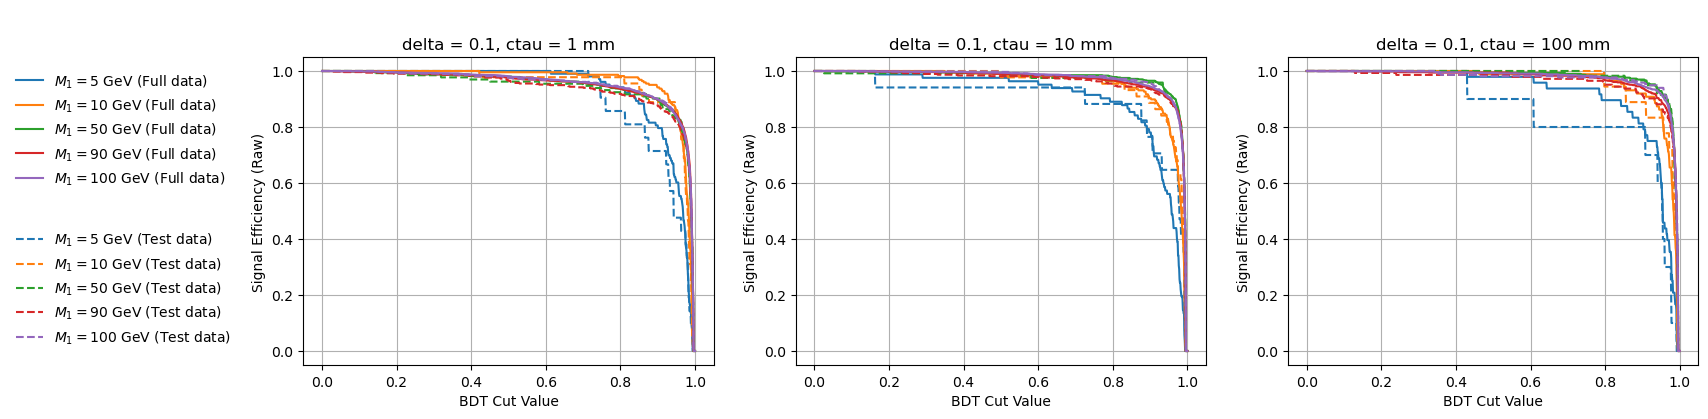

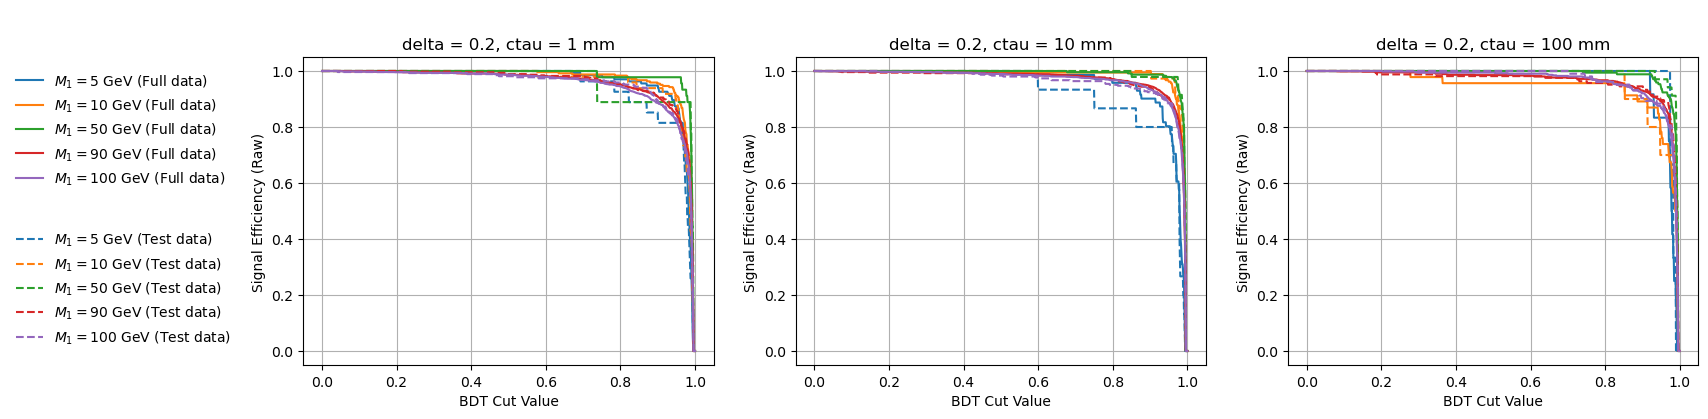

In [69]:
#m1s = [100]
m1s = [5, 10, 50, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Full data)", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    lines += [Line2D([0], [0], label="\n", color='white')] # add a "break line"
    lines += [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Test data)", color=massColors[m], linestyle='dashed') for m in sorted(list(massColors.keys()))]
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            point = f'm1_{m1}_delta_{delta}_ctau_{ctau}'
            
            axes[idx].plot(thres_arr[point], np.array(s_TPR_raw[point]), label='Training + Test Set', color=massColors[m1])
            axes[idx].plot(thres_arr_test[point], np.array(s_TPR_raw_test[point]), label='Test Set', linestyle='dashed', color=massColors[m1])

            axes[idx].grid()
            
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('BDT Cut Value')
        axes[idx].set_ylabel('Signal Efficiency (Raw)')
    
        #axes[idx].set_yscale('log')

        #axes[idx].set_xlim([0.7,0.99]) 
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

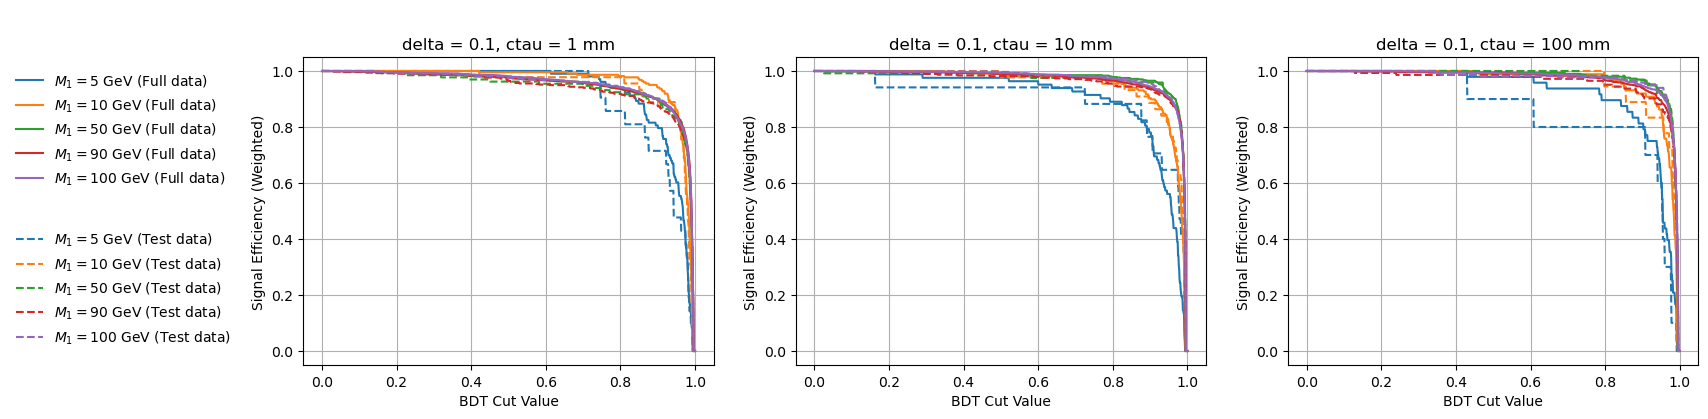

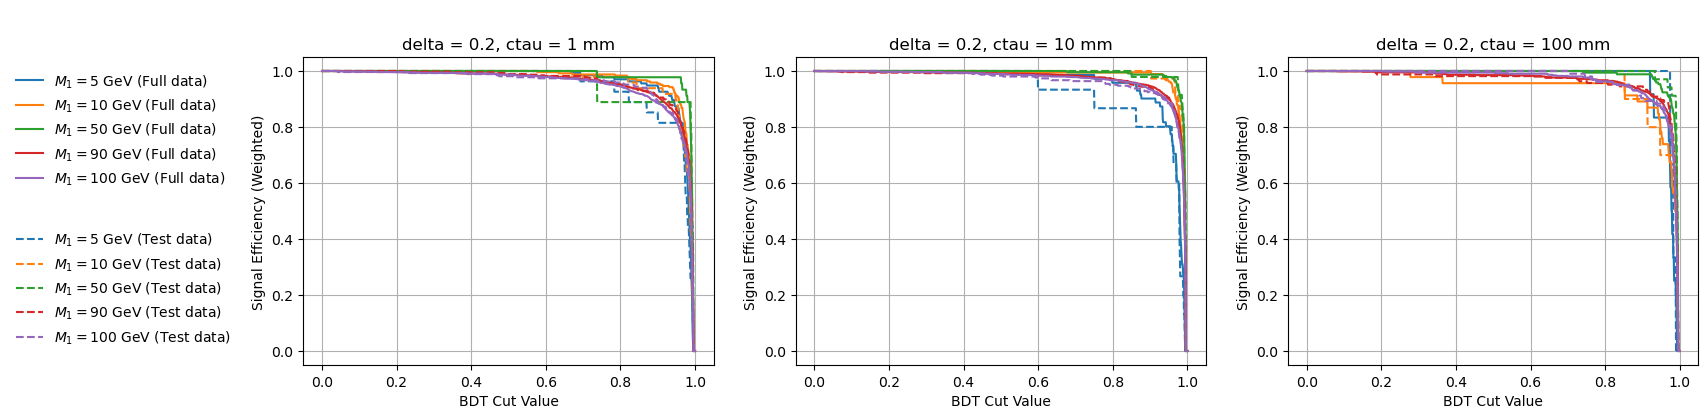

In [70]:
#m1s = [100]
m1s = [5, 10, 50, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Full data)", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    lines += [Line2D([0], [0], label="\n", color='white')] # add a "break line"
    lines += [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Test data)", color=massColors[m], linestyle='dashed') for m in sorted(list(massColors.keys()))]
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            point = f'm1_{m1}_delta_{delta}_ctau_{ctau}'
            
            axes[idx].plot(thres_arr[point], np.array(s_TPR_weighted[point]), label='Training + Test Set', color=massColors[m1])
            axes[idx].plot(thres_arr_test[point], np.array(s_TPR_weighted_test[point]), label='Test Set', linestyle='dashed', color=massColors[m1])

            axes[idx].grid()
            
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('BDT Cut Value')
        axes[idx].set_ylabel('Signal Efficiency (Weighted)')
    
        #axes[idx].set_yscale('log')

        #axes[idx].set_xlim([0.7,0.99]) 
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

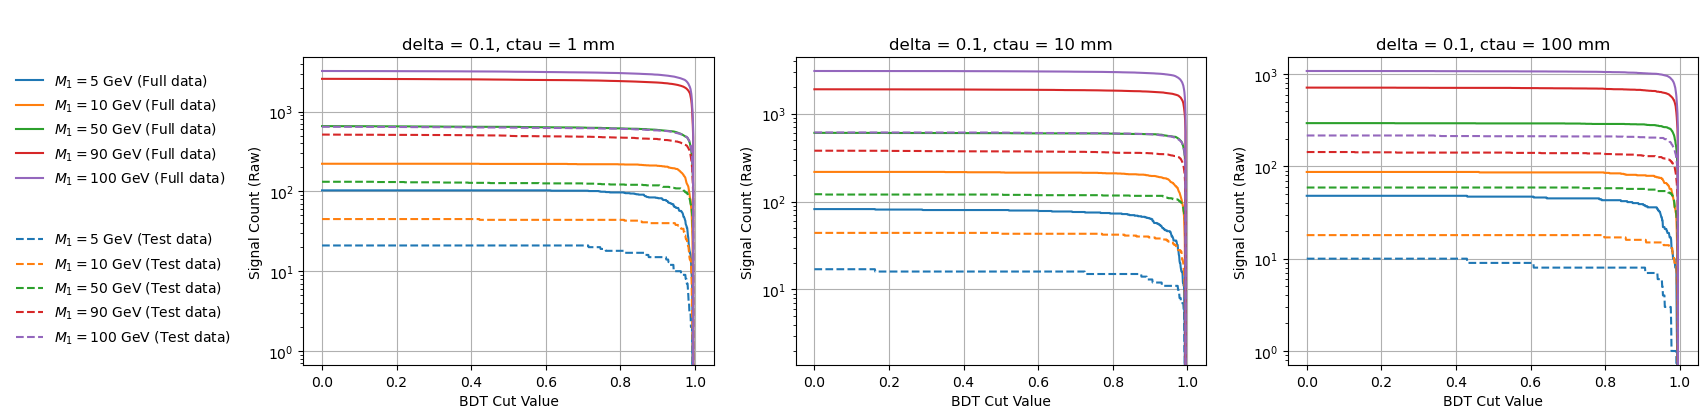

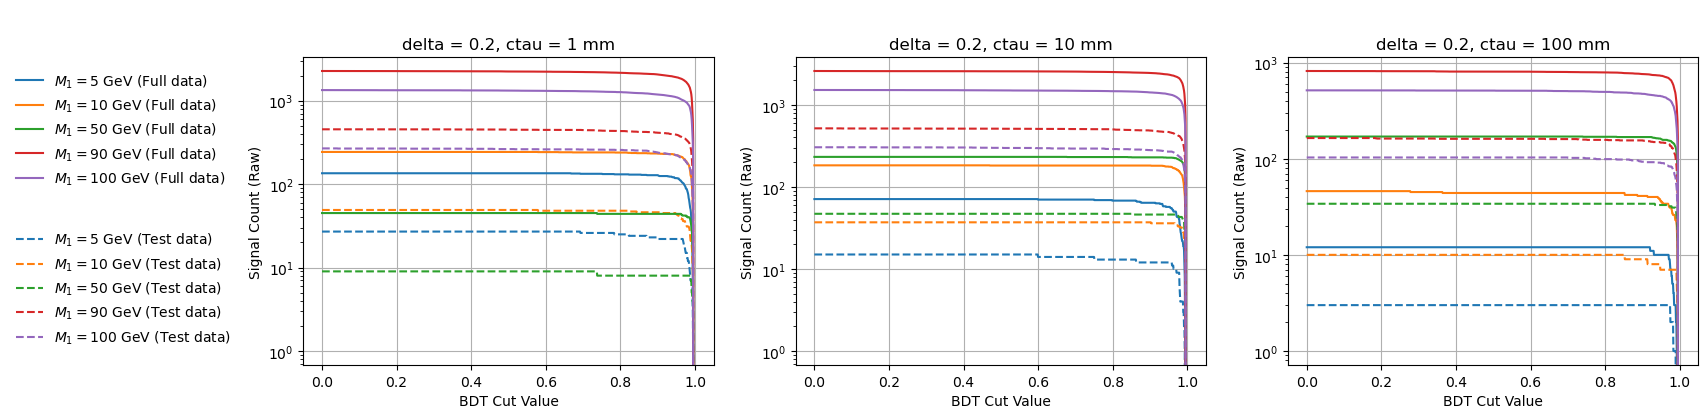

In [71]:
#m1s = [100]
m1s = [5, 10, 50, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Full data)", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    lines += [Line2D([0], [0], label="\n", color='white')] # add a "break line"
    lines += [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Test data)", color=massColors[m], linestyle='dashed') for m in sorted(list(massColors.keys()))]
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            point = f'm1_{m1}_delta_{delta}_ctau_{ctau}'
            
            axes[idx].plot(thres_arr[point], np.array(s_count_raw[point]), label='Training + Test Set', color=massColors[m1])
            axes[idx].plot(thres_arr_test[point], np.array(s_count_raw_test[point]), label='Test Set', linestyle='dashed', color=massColors[m1])

            axes[idx].grid()
            
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('BDT Cut Value')
        axes[idx].set_ylabel('Signal Count (Raw)')
    
        axes[idx].set_yscale('log')

        #axes[idx].set_xlim([0.7,0.99]) 
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

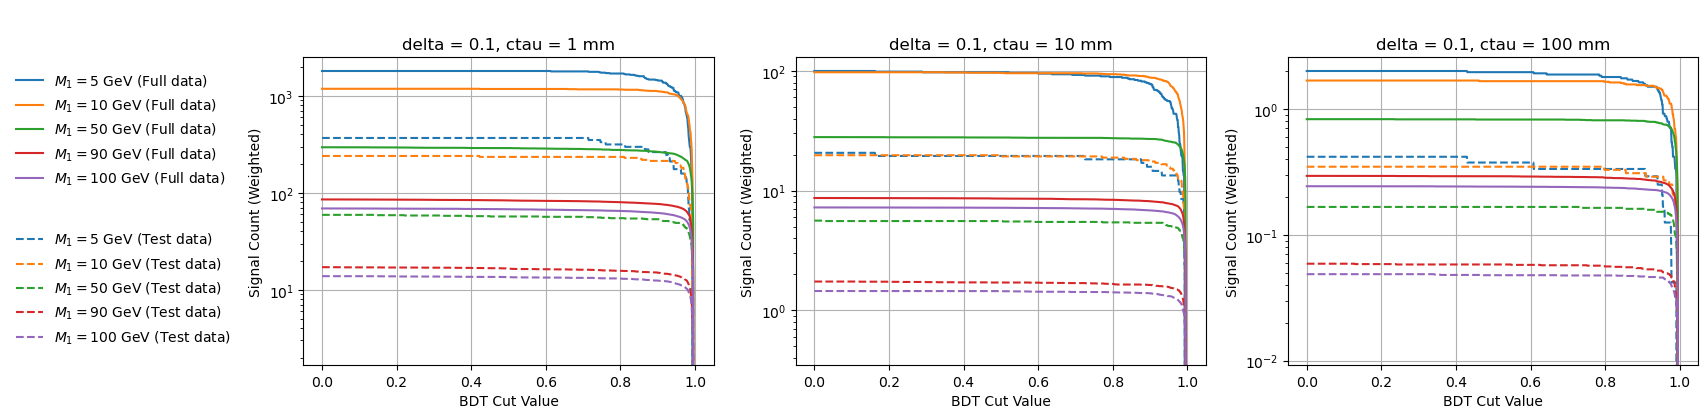

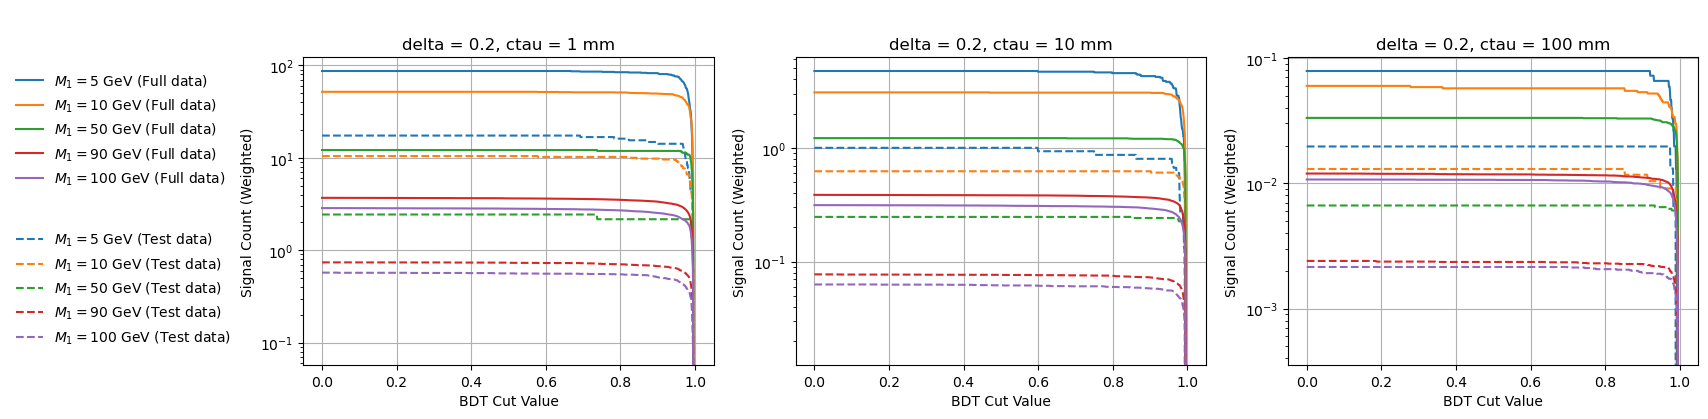

In [72]:
#m1s = [100]
m1s = [5, 10, 50, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Full data)", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    lines += [Line2D([0], [0], label="\n", color='white')] # add a "break line"
    lines += [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Test data)", color=massColors[m], linestyle='dashed') for m in sorted(list(massColors.keys()))]
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            point = f'm1_{m1}_delta_{delta}_ctau_{ctau}'
            
            axes[idx].plot(thres_arr[point], np.array(s_count_weighted[point]), label='Training + Test Set', color=massColors[m1])
            axes[idx].plot(thres_arr_test[point], np.array(s_count_weighted_test[point]), label='Test Set', linestyle='dashed', color=massColors[m1])

            axes[idx].grid()
            
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('BDT Cut Value')
        axes[idx].set_ylabel('Signal Count (Weighted)')
    
        axes[idx].set_yscale('log')

        #axes[idx].set_xlim([0.7,0.99]) 
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

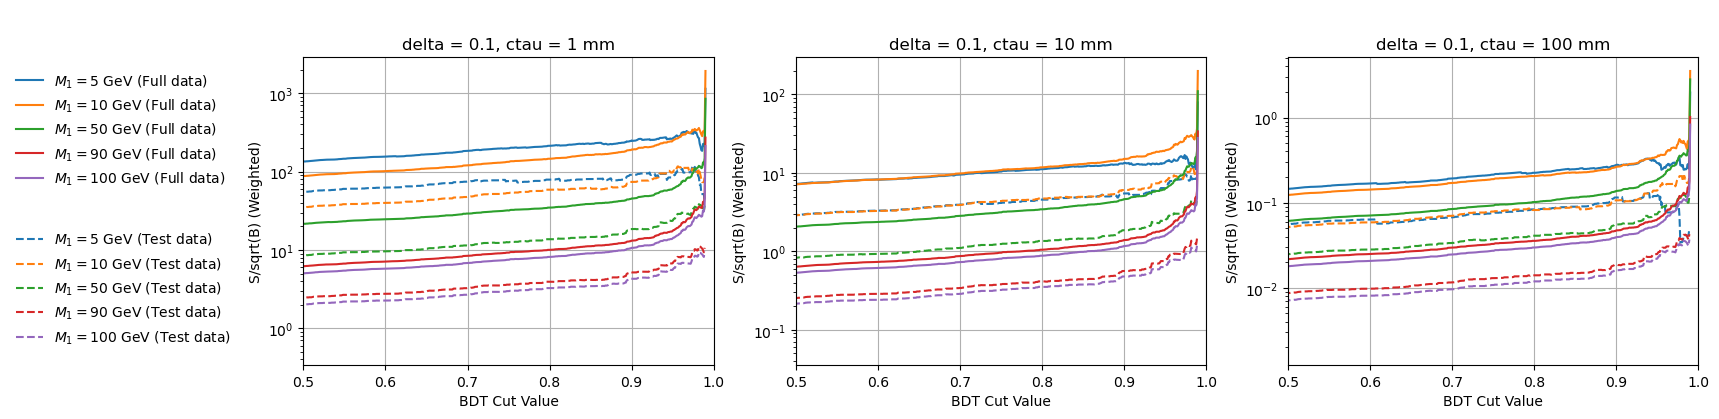

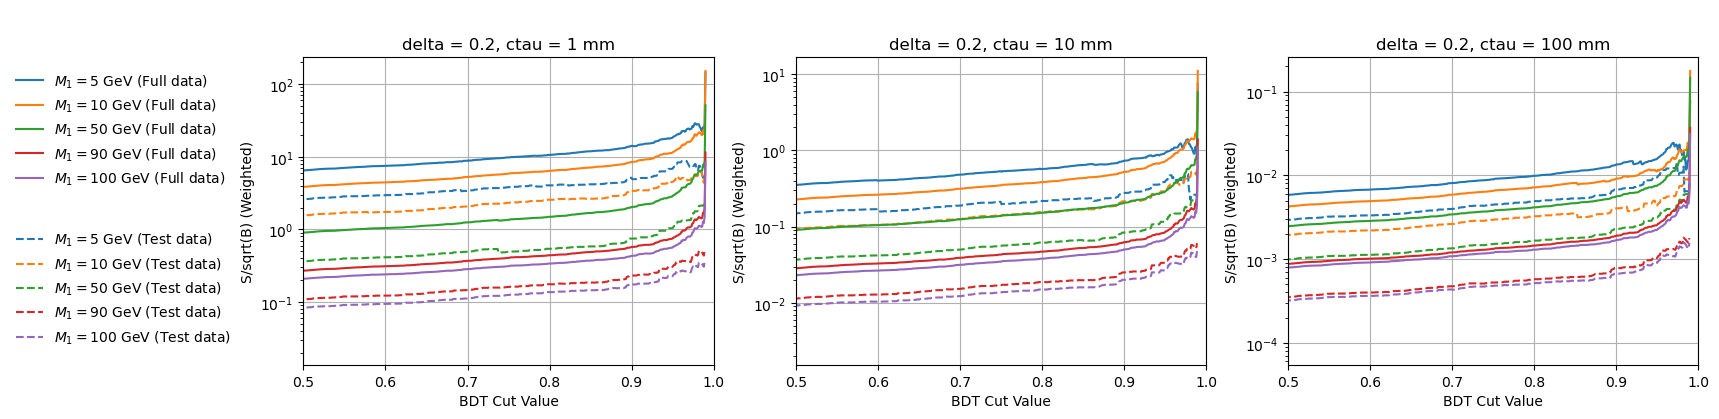

In [74]:
#m1s = [100]
m1s = [5, 10, 50, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Full data)", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    lines += [Line2D([0], [0], label="\n", color='white')] # add a "break line"
    lines += [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Test data)", color=massColors[m], linestyle='dashed') for m in sorted(list(massColors.keys()))]
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            point = f'm1_{m1}_delta_{delta}_ctau_{ctau}'
            
            axes[idx].plot(thres_arr[point], np.array(s_over_sqrtB_weighted[point]), label='Training + Test Set', color=massColors[m1])
            axes[idx].plot(thres_arr_test[point], np.array(s_over_sqrtB_weighted_test[point]), label='Test Set', linestyle='dashed', color=massColors[m1])

            axes[idx].grid()
            
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('BDT Cut Value')
        axes[idx].set_ylabel('S/sqrt(B) (Weighted)')
    
        axes[idx].set_yscale('log')

        axes[idx].set_xlim([0.5,1]) 
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

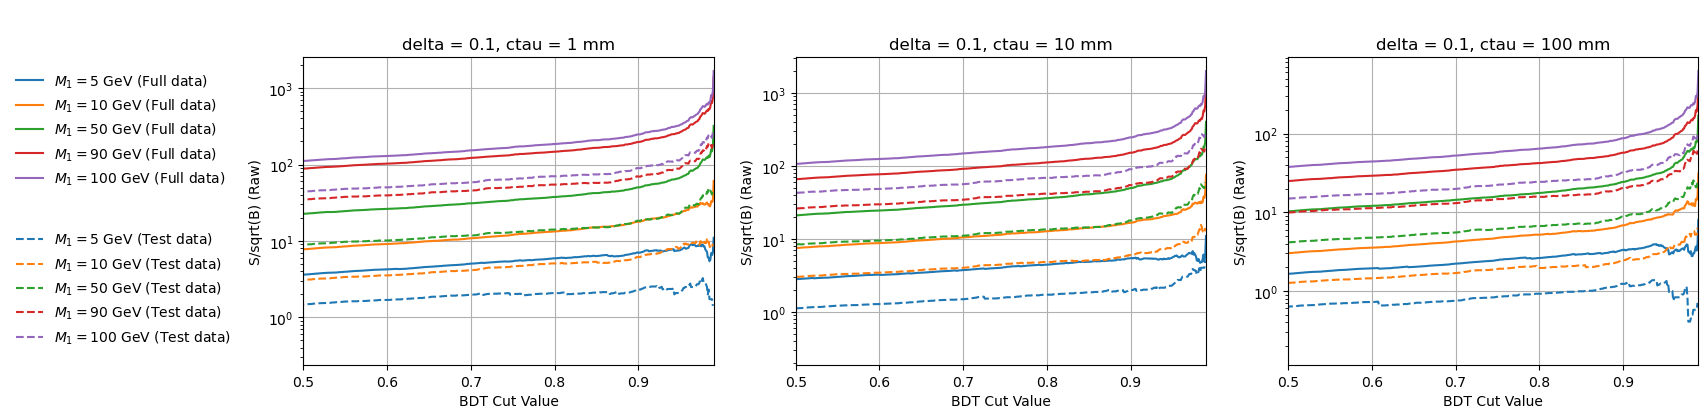

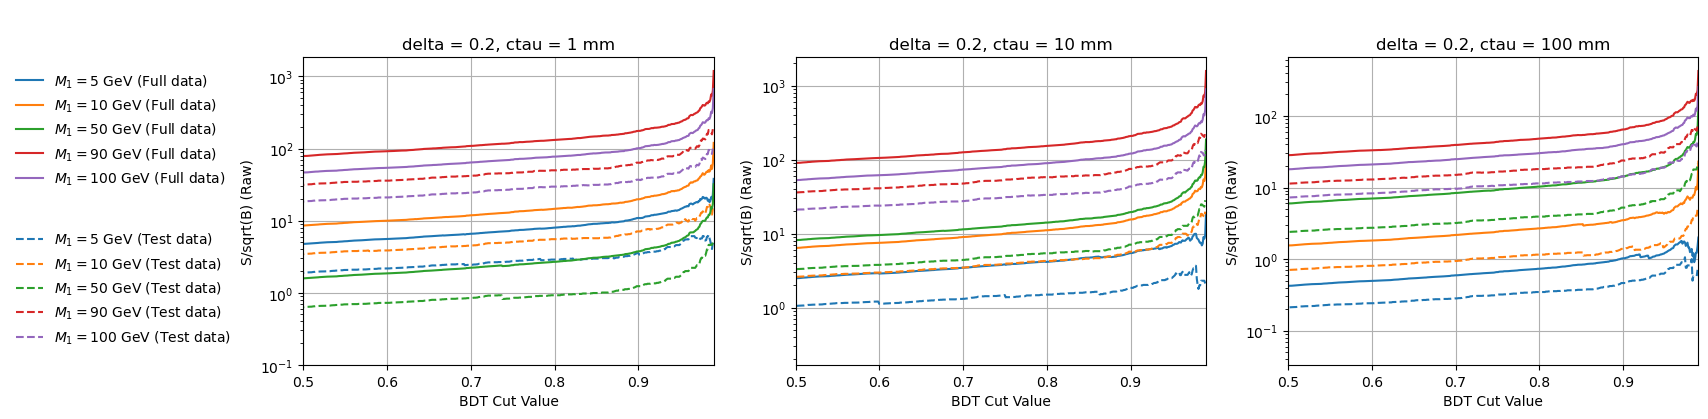

In [75]:
#m1s = [100]
m1s = [5, 10, 50, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Full data)", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    lines += [Line2D([0], [0], label="\n", color='white')] # add a "break line"
    lines += [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Test data)", color=massColors[m], linestyle='dashed') for m in sorted(list(massColors.keys()))]
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            point = f'm1_{m1}_delta_{delta}_ctau_{ctau}'
            
            axes[idx].plot(thres_arr[point], np.array(s_over_sqrtB_raw[point]), label='Training + Test Set', color=massColors[m1])
            axes[idx].plot(thres_arr_test[point], np.array(s_over_sqrtB_raw_test[point]), label='Test Set', linestyle='dashed', color=massColors[m1])

            axes[idx].grid()
            
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('BDT Cut Value')
        axes[idx].set_ylabel('S/sqrt(B) (Raw)')
    
        axes[idx].set_yscale('log')

        axes[idx].set_xlim([0.5,0.99]) 
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

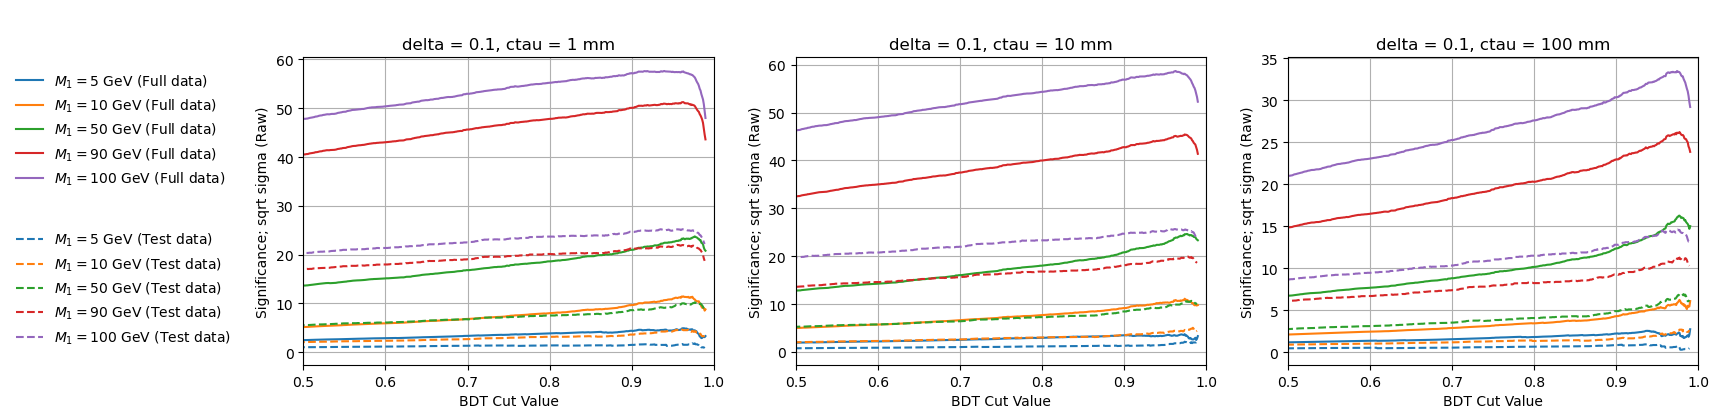

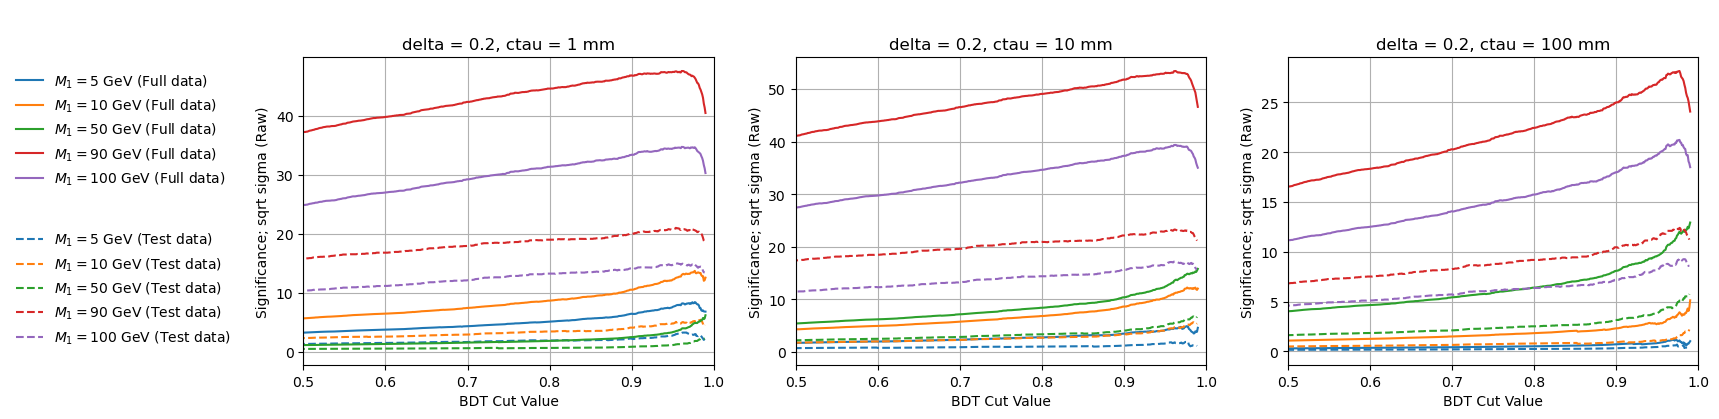

In [78]:
#m1s = [100]
m1s = [5, 10, 50, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Full data)", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    lines += [Line2D([0], [0], label="\n", color='white')] # add a "break line"
    lines += [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Test data)", color=massColors[m], linestyle='dashed') for m in sorted(list(massColors.keys()))]
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            point = f'm1_{m1}_delta_{delta}_ctau_{ctau}'
            
            axes[idx].plot(thres_arr[point], np.array(longsignif_sqrt_raw[point]), label='Training + Test Set', color=massColors[m1])
            axes[idx].plot(thres_arr_test[point], np.array(longsignif_sqrt_raw_test[point]), label='Test Set', linestyle='dashed', color=massColors[m1])

            axes[idx].grid()
            
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('BDT Cut Value')
        axes[idx].set_ylabel('Significance; sqrt sigma (Raw)')
    
        #axes[idx].set_yscale('log')

        axes[idx].set_xlim([0.5,1]) 
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

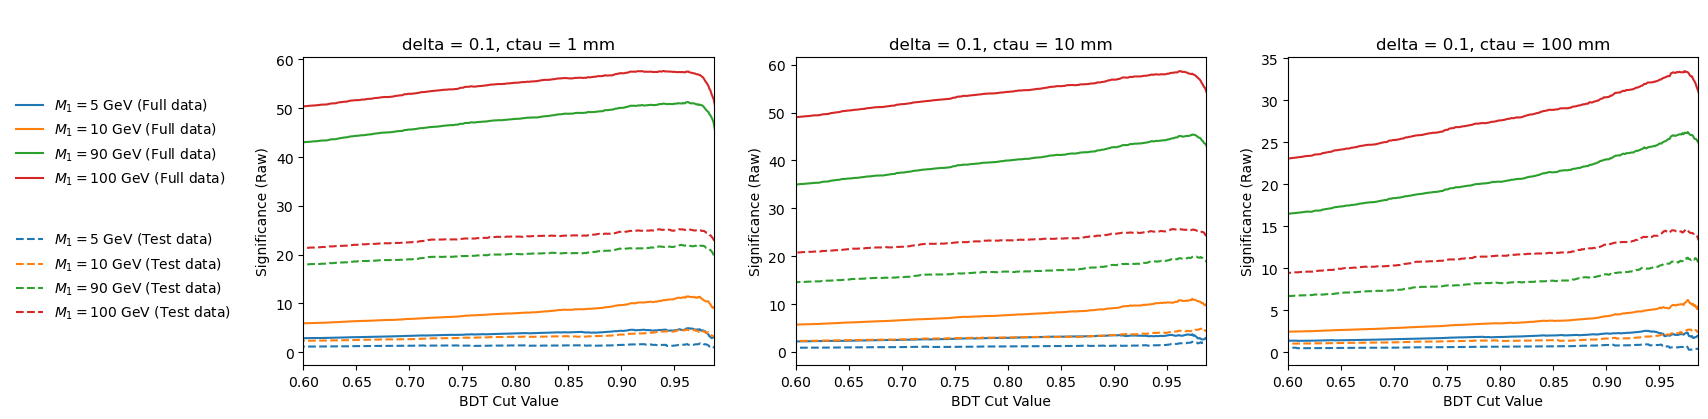

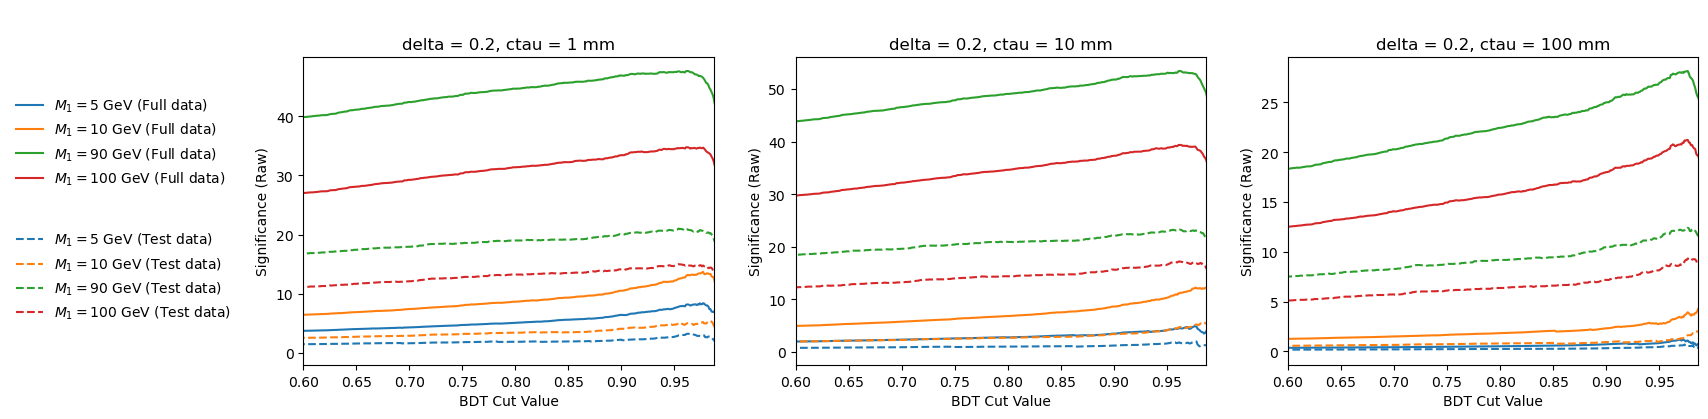

In [116]:
#m1s = [100]
m1s = [5, 10, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Full data)", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    lines += [Line2D([0], [0], label="\n", color='white')] # add a "break line"
    lines += [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Test data)", color=massColors[m], linestyle='dashed') for m in sorted(list(massColors.keys()))]
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            point = f'm1_{m1}_delta_{delta}_ctau_{ctau}'
            
            axes[idx].plot(thres_arr[point], np.array(longsignif_sqrt_raw[point]), label='Training + Test Set', color=massColors[m1])
            axes[idx].plot(thres_arr_test[point], np.array(longsignif_sqrt_raw_test[point]), label='Test Set', linestyle='dashed', color=massColors[m1])

            axes[idx].grid()
            
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('BDT Cut Value')
        axes[idx].set_ylabel('Significance (Raw)')
    
        #axes[idx].set_yscale('log')

        axes[idx].set_xlim([0.6,0.987]) 
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

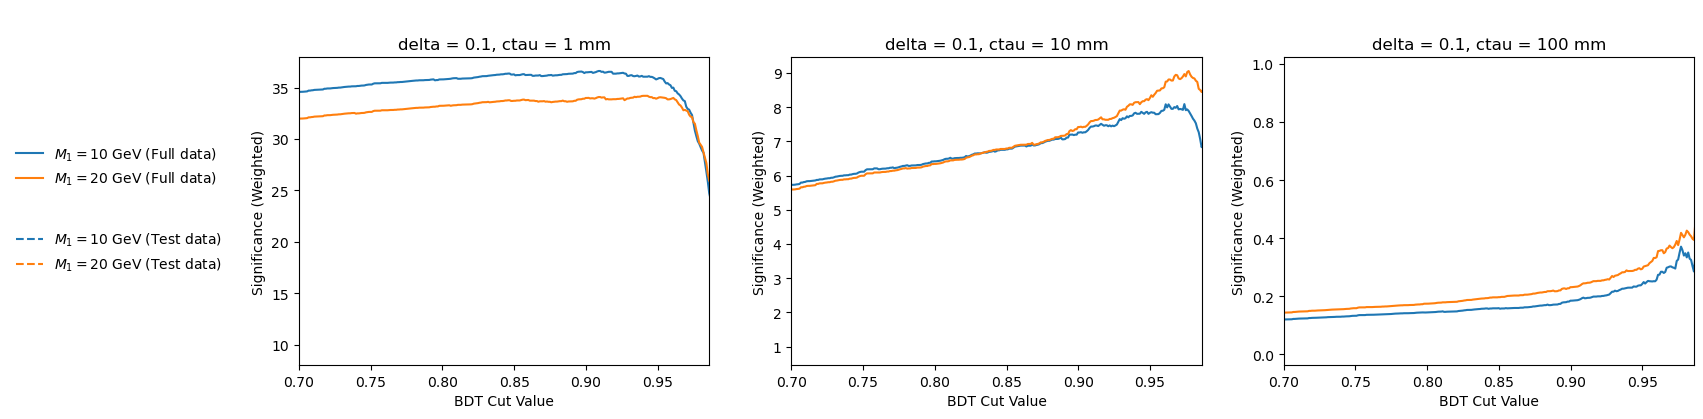

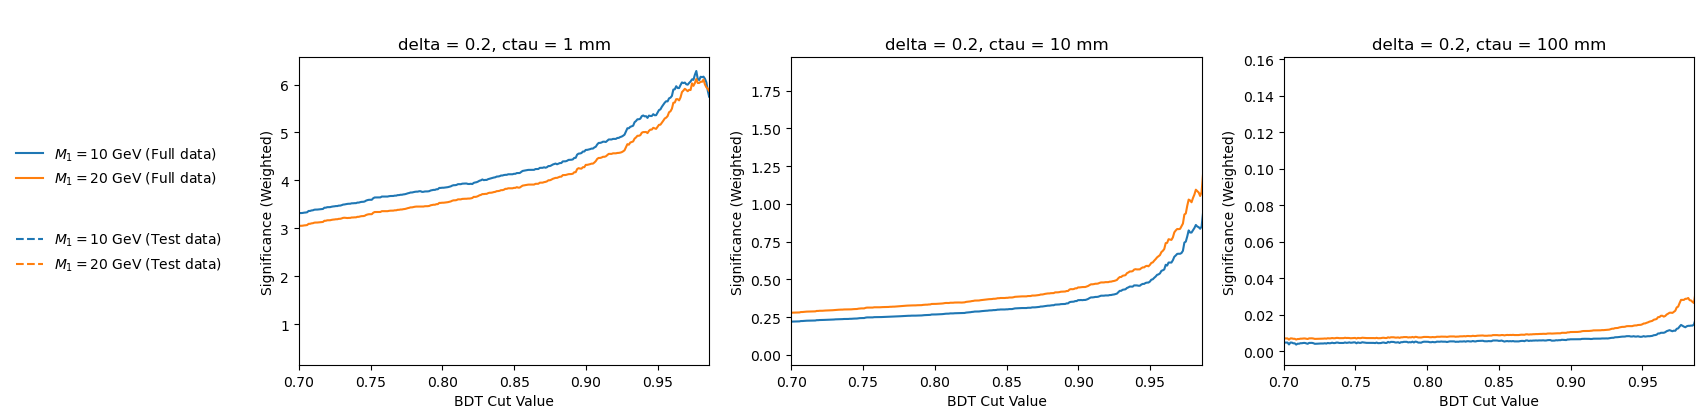

In [134]:
#m1s = [100]
m1s = [10, 20]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Full data)", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    lines += [Line2D([0], [0], label="\n", color='white')] # add a "break line"
    lines += [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Test data)", color=massColors[m], linestyle='dashed') for m in sorted(list(massColors.keys()))]
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            point = f'm1_{m1}_delta_{delta}_ctau_{ctau}'
            
            axes[idx].plot(thres_arr[point], np.array(longsignif_sqrt_weighted[point]), label='Training + Test Set', color=massColors[m1])
            #axes[idx].plot(thres_arr_test[point], np.array(longsignif_sqrt_weighted_test[point]), label='Test Set', linestyle='dashed', color=massColors[m1])

            axes[idx].grid()
            
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('BDT Cut Value')
        axes[idx].set_ylabel('Significance (Weighted)')
    
        #axes[idx].set_yscale('log')

        axes[idx].set_xlim([0.7,0.986]) 
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

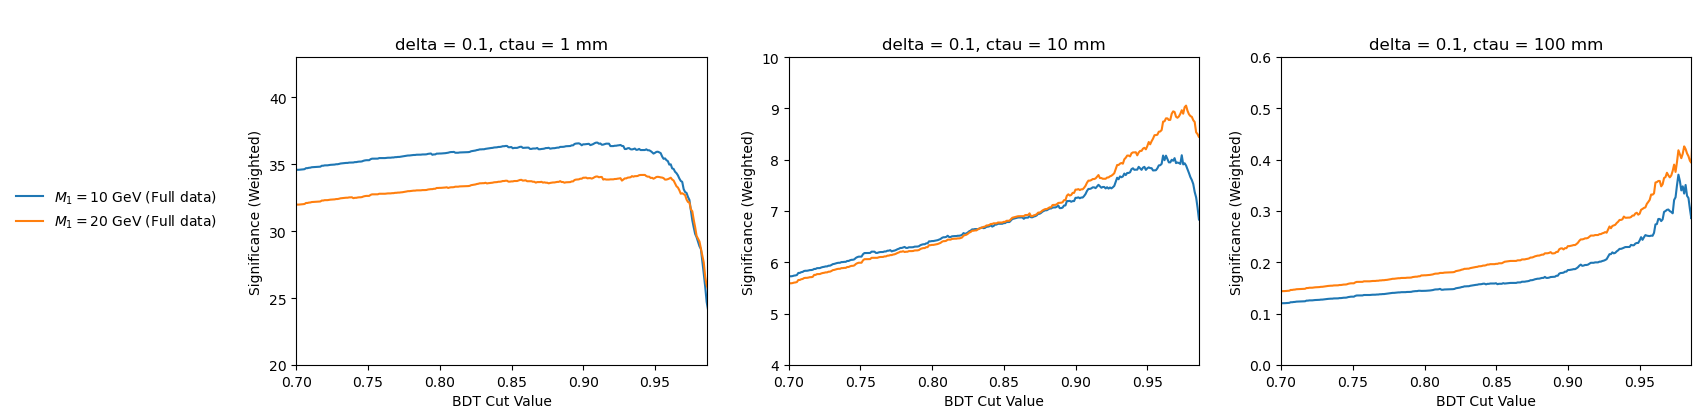

In [139]:
#m1s = [100]
m1s = [10, 20]
ctaus = [1, 10, 100]
deltas = [0.1]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Full data)", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    #lines += [Line2D([0], [0], label="\n", color='white')] # add a "break line"
    #lines += [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Test data)", color=massColors[m], linestyle='dashed') for m in sorted(list(massColors.keys()))]
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            point = f'm1_{m1}_delta_{delta}_ctau_{ctau}'
            
            axes[idx].plot(thres_arr[point], np.array(longsignif_sqrt_weighted[point]), label='Training + Test Set', color=massColors[m1])
            #axes[idx].plot(thres_arr_test[point], np.array(longsignif_sqrt_weighted_test[point]), label='Test Set', linestyle='dashed', color=massColors[m1])

            axes[idx].grid()
            
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('BDT Cut Value')
        axes[idx].set_ylabel('Significance (Weighted)')
    
        #axes[idx].set_yscale('log')

        if ctau == 1:
            axes[idx].set_ylim([20, 43])
        
        elif ctau == 10:
            axes[idx].set_ylim([4, 10])
            
        elif ctau == 100:
            axes[idx].set_ylim([0, 0.6])
        axes[idx].set_xlim([0.7,0.986]) 
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

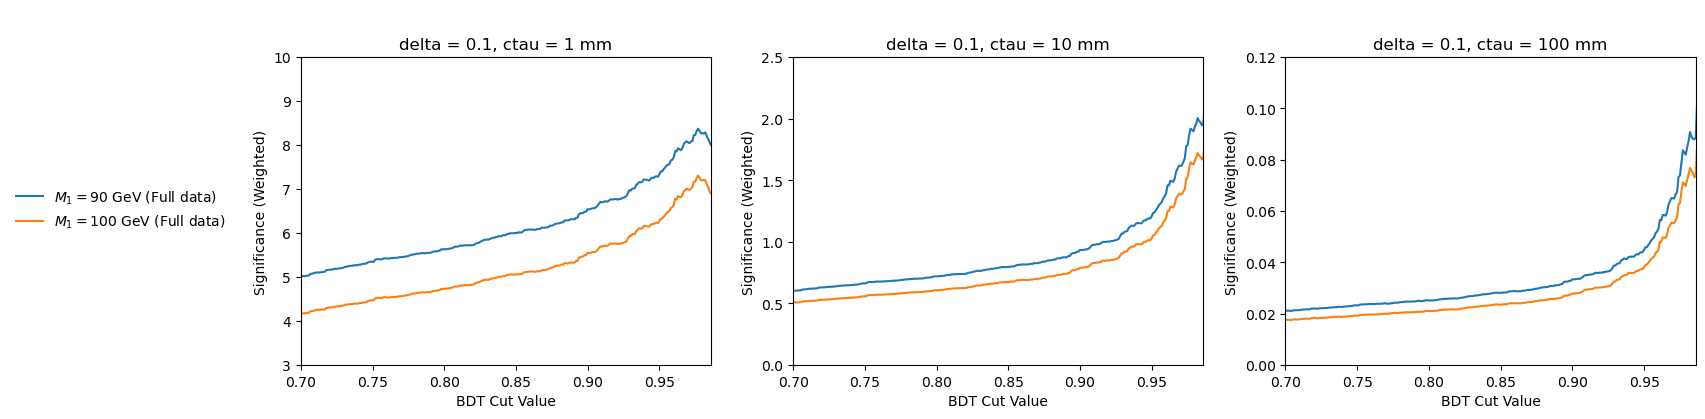

In [137]:
#m1s = [100]
m1s = [90, 100]
ctaus = [1, 10, 100]
deltas = [0.1]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Full data)", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    #lines += [Line2D([0], [0], label="\n", color='white')] # add a "break line"
    #lines += [Line2D([0], [0], label=f"$M_1 = {m}$ GeV (Test data)", color=massColors[m], linestyle='dashed') for m in sorted(list(massColors.keys()))]
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            point = f'm1_{m1}_delta_{delta}_ctau_{ctau}'
            
            axes[idx].plot(thres_arr[point], np.array(longsignif_sqrt_weighted[point]), label='Training + Test Set', color=massColors[m1])
            #axes[idx].plot(thres_arr_test[point], np.array(longsignif_sqrt_weighted_test[point]), label='Test Set', linestyle='dashed', color=massColors[m1])

            axes[idx].grid()
            
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('BDT Cut Value')
        axes[idx].set_ylabel('Significance (Weighted)')
    
        #axes[idx].set_yscale('log')

        if ctau == 1:
            axes[idx].set_ylim([3, 10])
        
        elif ctau == 10:
            axes[idx].set_ylim([0, 2.5])
            
        elif ctau == 100:
            axes[idx].set_ylim([0, 0.12])
        axes[idx].set_xlim([0.7,0.986]) 
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

1
[0.9629629629629629, 0.973973973973974, 0.9629629629629629, 0.973973973973974, 0.9769769769769769, 0.9769769769769769, 0.9629629629629629, 0.93993993993994]
[39, 22, 39, 22, 17, 17, 39, 79]
10
[0.973973973973974, 0.9769769769769769, 0.9769769769769769, 0.9769769769769769, 0.9769769769769769, 0.9769769769769769, 0.973973973973974, 0.9629629629629629]
[22, 17, 17, 17, 17, 17, 22, 39]
100
[0.9769769769769769, 0.98998998998999, 0.9769769769769769, 0.9769769769769769, 0.9769769769769769, 0.9769769769769769, 0.9769769769769769, 0.973973973973974]
[17, 1, 17, 17, 17, 17, 17, 22]


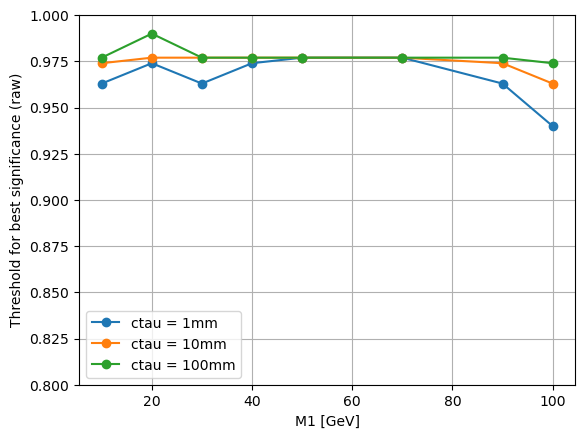

In [102]:
m1s = [10, 20, 30, 40, 50, 70, 90, 100]

delta = 0.1
#ctau = 1

for ctau in [1, 10, 100]:
    best_thres = []
    b_count_raws = []
    
    for m1 in m1s:
        point = f'm1_{m1}_delta_{delta}_ctau_{ctau}'
    
        arr = longsignif_sqrt_raw[point]
        arr = np.nan_to_num(arr)
        best_thres.append(thres_arr[point][np.argmax(arr)])
        b_count_raws.append(b_count_raw[np.argmax(arr)])

    plt.plot(m1s, best_thres, '-o', label=f'ctau = {ctau}mm')
    print(ctau)
    print(best_thres)
    print(b_count_raws)
    
plt.xlabel('M1 [GeV]')
plt.ylabel('Threshold for best significance (raw)')

plt.grid()
plt.ylim([0.8, 1])

plt.legend()

Text(0.5, 1.0, 'Using raw event count')

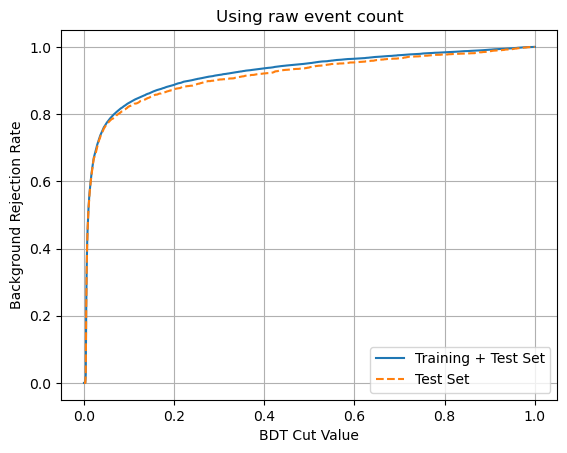

In [90]:
fig, ax = plt.subplots()

ax.plot(thres_arr[point], 1-np.array(b_FPR_raw), label='Training + Test Set')
ax.plot(thres_arr_test[point], 1-np.array(b_FPR_raw_test), label='Test Set', linestyle='dashed')

ax.set_xlabel('BDT Cut Value')
ax.set_ylabel('Background Rejection Rate')

plt.legend()
plt.grid()

plt.title("Using raw event count")

Text(0.5, 1.0, 'Using xsec-weighted event count')

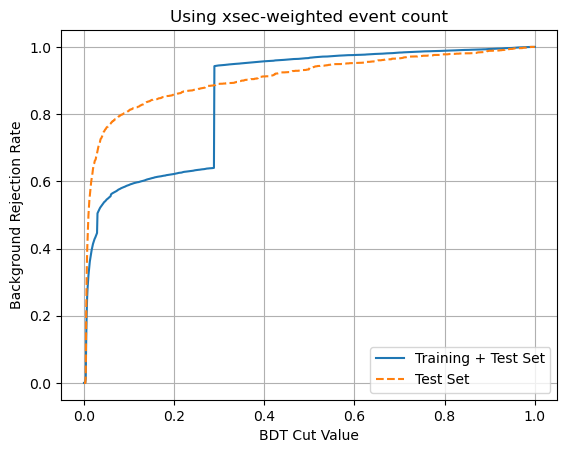

In [140]:
fig, ax = plt.subplots()

ax.plot(thres_arr[point], 1-np.array(b_FPR_weighted), label='Training + Test Set')
ax.plot(thres_arr_test[point], 1-np.array(b_FPR_weighted_test), label='Test Set', linestyle='dashed')

ax.set_xlabel('BDT Cut Value')
ax.set_ylabel('Background Rejection Rate')

plt.legend()
plt.grid()

plt.title("Using xsec-weighted event count")

Text(0.5, 1.0, 'Using raw event count')

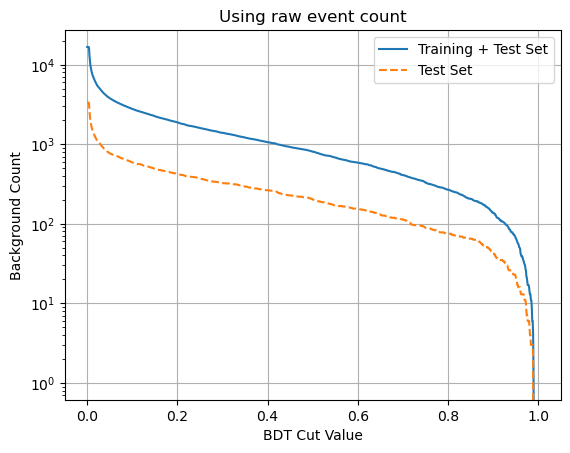

In [92]:
fig, ax = plt.subplots()

ax.plot(thres_arr[point], b_count_raw, label='Training + Test Set')
ax.plot(thres_arr_test[point], b_count_raw_test, label='Test Set', linestyle='dashed')

ax.set_xlabel('BDT Cut Value')
ax.set_ylabel('Background Count')

plt.legend()
plt.grid()

plt.yscale('log')

plt.title("Using raw event count")

Text(0.5, 1.0, 'Using xsec-weighted event count')

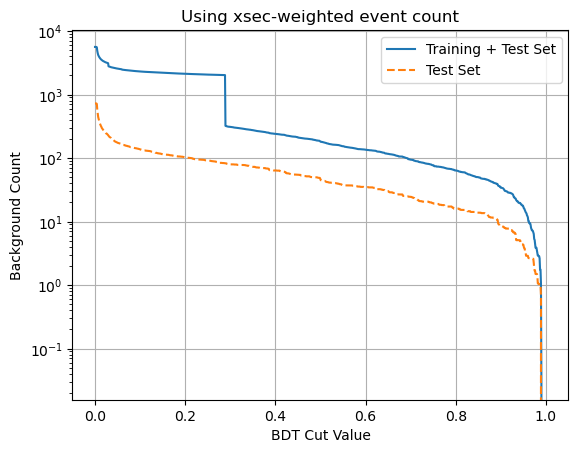

In [93]:
fig, ax = plt.subplots()

ax.plot(thres_arr[point], b_count_weighted, label='Training + Test Set')
ax.plot(thres_arr_test[point], b_count_weighted_test, label='Test Set', linestyle='dashed')

ax.set_xlabel('BDT Cut Value')
ax.set_ylabel('Background Count')

plt.legend()
plt.grid()

plt.yscale('log')

plt.title("Using xsec-weighted event count")

In [94]:
m1 = 0
delta = 0
ctau = 0

train_total_weighted = np.sum(train_xsec_norm[(train_m1 == m1) & (train_delta == delta) & (train_ctau == ctau)])
train_total_raw = len(train_xsec_norm[(train_m1 == m1) & (train_delta == delta) & (train_ctau == ctau)])

train_pass_weighted = np.sum(train_xsec_norm[(train_m1 == m1) & (train_delta == delta) & (train_ctau == ctau) & (pred_train > thres)])
train_pass_raw = len(train_xsec_norm[(train_m1 == m1) & (train_delta == delta) & (train_ctau == ctau) & (pred_train > thres)])

test_total_weighted = np.sum(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau)])
test_total_raw = len(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau)])

test_pass_weighted = np.sum(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau) & (pred_test > thres)])
test_pass_raw = len(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau) & (pred_test > thres)])

total_weighted = train_total_weighted + test_total_weighted
total_raw = train_total_raw + test_total_raw

pass_weighted = train_pass_weighted + test_pass_weighted
pass_raw = train_pass_raw + test_pass_raw

print('\nRAW COUNT\n')
print(f'Train set: {train_pass_raw} / {train_total_raw} = {train_pass_raw/train_total_raw:.4f}')
print(f'Test set: {test_pass_raw} / {test_total_raw} = {test_pass_raw/test_total_raw:.4f}')
print(f'Total: {pass_raw} / {total_raw} = {pass_raw/total_raw:.4f}')

print('\nXSEC WEIGHTED\n')
print(f'Train set: {train_pass_weighted} / {train_total_weighted} = {train_pass_weighted/train_total_weighted:.4f}')
print(f'Test set: {test_pass_weighted} / {test_total_weighted} = {test_pass_weighted/test_total_weighted:.4f}')
print(f'Total: {pass_weighted} / {total_weighted} = {pass_weighted/total_weighted:.4f}')


RAW COUNT

Train set: 95 / 13359 = 0.0071
Test set: 42 / 3340 = 0.0126
Total: 137 / 16699 = 0.0082

XSEC WEIGHTED

Train set: 25.6680850982666 / 4896.8974609375 = 0.0052
Test set: 8.384312629699707 / 724.5829467773438 = 0.0116
Total: 34.052398681640625 / 5621.48046875 = 0.0061


In [ ]:
# sig
m1 = 5
delta = 0.1
ctau = 1

train_total_weighted = np.sum(train_xsec_norm[(train_m1 == m1) & (train_delta == delta) & (train_ctau == ctau)])
train_total_raw = len(train_xsec_norm[(train_m1 == m1) & (train_delta == delta) & (train_ctau == ctau)])

train_pass_weighted = np.sum(train_xsec_norm[(train_m1 == m1) & (train_delta == delta) & (train_ctau == ctau) & (pred_train > thres)])
train_pass_raw = len(train_xsec_norm[(train_m1 == m1) & (train_delta == delta) & (train_ctau == ctau) & (pred_train > thres)])

test_total_weighted = np.sum(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau)])
test_total_raw = len(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau)])

test_pass_weighted = np.sum(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau) & (pred_test > thres)])
test_pass_raw = len(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau) & (pred_test > thres)])

total_weighted = train_total_weighted + test_total_weighted
total_raw = train_total_raw + test_total_raw

pass_weighted = train_pass_weighted + test_pass_weighted
pass_raw = train_pass_raw + test_pass_raw

print('\nRAW COUNT\n')
print(f'Train set: {train_pass_raw} / {train_total_raw} = {train_pass_raw/train_total_raw:.4f}')
print(f'Test set: {test_pass_raw} / {test_total_raw} = {test_pass_raw/test_total_raw:.4f}')
print(f'Total: {pass_raw} / {total_raw} = {pass_raw/total_raw:.4f}')

print('\nXSEC WEIGHTED\n')
print(f'Train set: {train_pass_weighted} / {train_total_weighted} = {train_pass_weighted/train_total_weighted:.4f}')
print(f'Test set: {test_pass_weighted} / {test_total_weighted} = {test_pass_weighted/test_total_weighted:.4f}')
print(f'Total: {pass_weighted} / {total_weighted} = {pass_weighted/total_weighted:.4f}')

In [ ]:
# sig
tpr_raw = {}
tpr_weighted = {}
test_total = {}

for delta in [0.1, 0.2]:
    tpr_raw[f'{delta}'] = {}
    tpr_weighted[f'{delta}'] = {}
    test_total[f'{delta}'] = {}
    
    for ctau in [1, 10, 100]:   
        tpr_raw[f'{delta}'][f'{ctau}'] = []
        tpr_weighted[f'{delta}'][f'{ctau}'] = []
        test_total[f'{delta}'][f'{ctau}'] = []
        
        for m1 in [5, 10, 20, 30, 40, 50, 70, 90, 100]:
            #print(m1, delta, ctau)
            test_total_weighted = np.sum(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau)])
            test_total_raw = len(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau)])
            
            test_pass_weighted = np.sum(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau) & (pred_test > thres)])
            test_pass_raw = len(test_xsec_norm[(test_m1 == m1) & (test_delta == delta) & (test_ctau == ctau) & (pred_test > thres)])

            tpr_raw[f'{delta}'][f'{ctau}'].append(test_pass_raw / test_total_raw)
            tpr_weighted[f'{delta}'][f'{ctau}'].append(test_pass_weighted / test_total_weighted)

            test_total[f'{delta}'][f'{ctau}'].append(test_total_raw)

In [ ]:
for delta in ['0.1', '0.2']:
    for ctau in [1, 10, 100]:
        fig, ax = plt.subplots(1)
          
        arr = np.array([tpr_raw[delta][f'{ctau}']])
        
        ax.imshow(arr, interpolation ='none', cmap='jet', vmin=0, vmax=1)
            
        #plt.colorbar(im)
            
        for (j,i),label in np.ndenumerate(arr):
            label = '{:.2f}'.format(label)
            ax.text(i,j,label,ha='center',va='center')
            
        plt.title(f'TPR Raw; Delta = {delta}')
        plt.ylabel('ctau')
        plt.xlabel('M1')

        m1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]
        
        plt.xticks(range(len(m1s)), m1s)
        plt.yticks(range(0,1), [f'{ctau}'])
        plt.gca().invert_yaxis()
            
        plt.show()

In [ ]:
for delta in ['0.1', '0.2']:
    for ctau in [1, 10, 100]:
        fig, ax = plt.subplots(1)
          
        arr = np.array([tpr_weighted[delta][f'{ctau}']])
        
        ax.imshow(arr, interpolation ='none', cmap='jet', vmin=0, vmax=1)
            
        #plt.colorbar(im)
            
        for (j,i),label in np.ndenumerate(arr):
            label = '{:.2f}'.format(label)
            ax.text(i,j,label,ha='center',va='center')
            
        plt.title(f'Signal Efficiency; Delta = {delta}')
        plt.ylabel('ctau')
        plt.xlabel('M1')

        m1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]
        
        plt.xticks(range(len(m1s)), m1s)
        plt.yticks(range(0,1), [f'{ctau}'])
        plt.gca().invert_yaxis()
            
        plt.show()

In [ ]:
for delta in ['0.1', '0.2']:
    for ctau in [1, 10, 100]:
        fig, ax = plt.subplots(1)
          
        arr = np.array([test_total[delta][f'{ctau}']])
        
        ax.imshow(arr, interpolation ='none', cmap='jet', vmin=0, vmax=1000)
            
        #plt.colorbar(im)
            
        for (j,i),label in np.ndenumerate(arr):
            label = '{:.2f}'.format(label)
            ax.text(i,j,label,ha='center',va='center')
            
        plt.title(f'Raw count; Delta = {delta}')
        plt.ylabel('ctau')
        plt.xlabel('M1')

        m1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]
        
        plt.xticks(range(len(m1s)), m1s)
        plt.yticks(range(0,1), [f'{ctau}'])
        plt.gca().invert_yaxis()
            
        plt.show()

In [ ]:
for delta in ['0.1', '0.2']:
    for ctau in [1, 100]:
        fig, ax = plt.subplots(1)
          
        arr = np.array([tpr_weighted[delta][f'{ctau}']])
        
        ax.imshow(arr, interpolation ='none', cmap='jet', vmin=0, vmax=1)
            
        #plt.colorbar(im)
            
        for (j,i),label in np.ndenumerate(arr):
            label = '{:.2f}'.format(label)
            ax.text(i,j,label,ha='center',va='center')
            
        plt.title(f'Signal Efficiency; Delta = {delta}')
        plt.ylabel('ctau')
        plt.xlabel('M1')

        m1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]
        
        plt.xticks(range(len(m1s)), m1s)
        plt.yticks(range(0,1), [f'{ctau}'])
        plt.gca().invert_yaxis()
            
        plt.show()

In [ ]:
for delta in ['0.1', '0.2']:
    for ctau in [1, 100]:
        fig, ax = plt.subplots(1)
          
        arr = np.array([test_total[delta][f'{ctau}']])
        
        ax.imshow(arr, interpolation ='none', cmap='jet', vmin=0, vmax=1000)
            
        #plt.colorbar(im)
            
        for (j,i),label in np.ndenumerate(arr):
            label = '{:.2f}'.format(label)
            ax.text(i,j,label,ha='center',va='center')
            
        plt.title(f'Raw count; Delta = {delta}')
        plt.ylabel('ctau')
        plt.xlabel('M1')

        m1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]
        
        plt.xticks(range(len(m1s)), m1s)
        plt.yticks(range(0,1), [f'{ctau}'])
        plt.gca().invert_yaxis()
            
        plt.show()